# 복습

In [1]:
## 재구조화

In [2]:
import pandas as pd

In [4]:
df1 = pd.read_excel('02_Data.xlsx',skiprows=1)
df1.head()

카테고리명 자재그룹명 제품명  2019-12-01 00:00:00  2019-12-02 00:00:00  \
0   CHB    E1   A                  0.0                  0.0   
1   CHB    E1   B                  0.0                  0.0   
2   CHB    E1   C               9474.3               9741.7   
3   CHB    E1   D               7702.6               6117.1   
4   CHB    E1   E              56309.6              78268.0   

   2019-12-03 00:00:00  2019-12-04 00:00:00  2019-12-05 00:00:00  \
0                  0.0                  0.0                 98.8   
1                  0.0                  0.0                393.7   
2               6965.7               3368.2               9480.7   
3               4009.9               2669.8               7710.3   
4              74942.2              84690.1              56602.6   

   2019-12-06 00:00:00  2020-12-01 00:00:00  2020-12-02 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2               9741.7               6972.0               3368.2   
3               6127.3               4009.9               2680.1   
4              78268.0              74942.2              84967.2   

   2020-12-03 00:00:00  2020-12-04 00:00:00  2020-12-05 00:00:00  \
0                 98.8                  0.0                  0.0   
1                393.7                  0.0                  0.0   
2                  6.4                  0.0                  6.4   
3                  7.7                 10.2                  0.0   
4                293.0                  0.0                  0.0   

   2020-12-06 00:00:00     안전재고 분류  
0                  0.0      0.0  E  
1                  0.0      0.0  E  
2                  0.0      0.0  A  
3                 10.2      0.0  A  
4                277.2  39593.3  A

In [6]:
df2 = df1.melt(id_vars = ['카테고리명','자재그룹명','제품명','안전재고','분류'])
df2

카테고리명 자재그룹명  제품명     안전재고 분류             variable    value
0     CHB    E1    A      0.0  E  2019-12-01 00:00:00      0.0
1     CHB    E1    B      0.0  E  2019-12-01 00:00:00      0.0
2     CHB    E1    C      0.0  A  2019-12-01 00:00:00   9474.3
3     CHB    E1    D      0.0  A  2019-12-01 00:00:00   7702.6
4     CHB    E1    E  39593.3  A  2019-12-01 00:00:00  56309.6
..    ...   ...  ...      ... ..                  ...      ...
475   CHB    E2   Z2      0.0  K  2020-12-06 00:00:00      0.0
476   CHB    E2   Z3      0.0  K  2020-12-06 00:00:00      0.0
477   CHB    E2   KC      0.0  E  2020-12-06 00:00:00      0.0
478   CHB    E2  KC2      0.0  L  2020-12-06 00:00:00      0.0
479   CHB    E2  KC3      0.0  F  2020-12-06 00:00:00     36.1

[480 rows x 7 columns]

In [8]:
df1.shape

# 12 컬럼을 melt 시켜서
# 원래 40줄이었던 테이블이
# 480줄이 됐다.

(40, 17)

## 병합
- key column을 기준으로 공통의 값을 병합한다
- inner /outer / left / right
  

In [20]:
data1 = pd.DataFrame({'이름' : ['신짱구','신형만'],
        '성별':['남','남'] })

data2 = pd.DataFrame({'이름' : ['신짱구','신형만','유리'],
        '부서':['A','A','B'],
        '직급':['사원','주임','대리']})

In [21]:
data1

이름 성별
0  신짱구  남
1  신형만  남

In [22]:
data2

이름 부서  직급
0  신짱구  A  사원
1  신형만  A  주임
2   유리  B  대리

In [23]:
pd.merge(data1,data2,on='이름',how='inner')

이름 성별 부서  직급
0  신짱구  남  A  사원
1  신형만  남  A  주임

In [24]:
pd.merge(data1,data2,on='이름',how='outer')

이름   성별 부서  직급
0  신짱구    남  A  사원
1  신형만    남  A  주임
2   유리  NaN  B  대리

In [25]:
pd.merge(data1,data2,on='이름',how='left')

이름 성별 부서  직급
0  신짱구  남  A  사원
1  신형만  남  A  주임

In [26]:
pd.merge(data1,data2,on='이름',how='right')

이름   성별 부서  직급
0  신짱구    남  A  사원
1  신형만    남  A  주임
2   유리  NaN  B  대리

## 파생변수
- quantile 함수 사용

In [28]:
df2 = pd.read_csv('Merge_Data.csv')
df2.head()

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액   총구매수량  \
0           0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230   382.0   
1           1  2102  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71  2095860   472.5   
2           2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550  1675.4   
3           3  2104  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49  6289495  1401.8   
4           4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930   602.0   

   총방문횟수  
0     86  
1     79  
2    126  
3    125  
4     57

In [29]:
df2['총구매금액'].describe()

count    4.285000e+03
mean     9.747687e+05
std      2.168500e+06
min      0.000000e+00
25%      3.475000e+04
50%      1.477500e+05
75%      7.887900e+05
max      2.234635e+07
Name: 총구매금액, dtype: float64

In [30]:
pd.options.display.float_format = '{:.2f}'.format

In [31]:
df2['총구매금액'].describe()

count       4285.00
mean      974768.73
std      2168499.82
min            0.00
25%        34750.00
50%       147750.00
75%       788790.00
max     22346350.00
Name: 총구매금액, dtype: float64

In [32]:
df2['총구매금액'].quantile(0.8)

1160644.0000000002

In [33]:
def rankfunc(row):
    if row >=df2['총구매금액'].quantile(0.8):
        return 'VIP'
    else: 
        return '일반'

df2['총구매금액'].apply(rankfunc)

0       VIP
1       VIP
2       VIP
3       VIP
4       VIP
       ... 
4280     일반
4281     일반
4282     일반
4283     일반
4284     일반
Name: 총구매금액, Length: 4285, dtype: object

In [34]:
for i in [1,2,3]:
    print(i)

1
2
3


## 시각화

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font',family = 'Malgun Gothic')
#AppleGothic

In [39]:
import warnings
warnings.simplefilter( action = 'ignore', category = FutureWarning)

In [42]:
df1 = pd.read_csv('01_Data.csv')

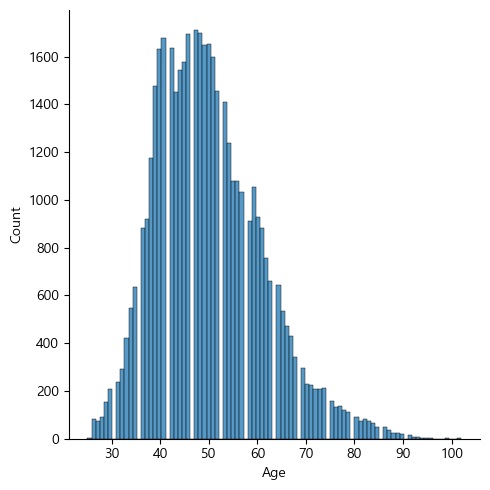

In [43]:
sns.displot(df1, x='Age')

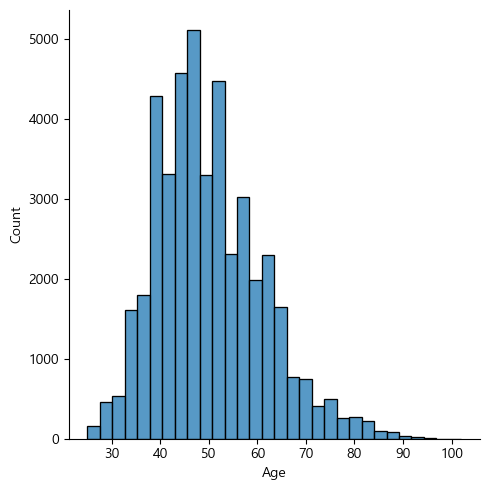

In [44]:
sns.displot(df1, x='Age', bins= 30)

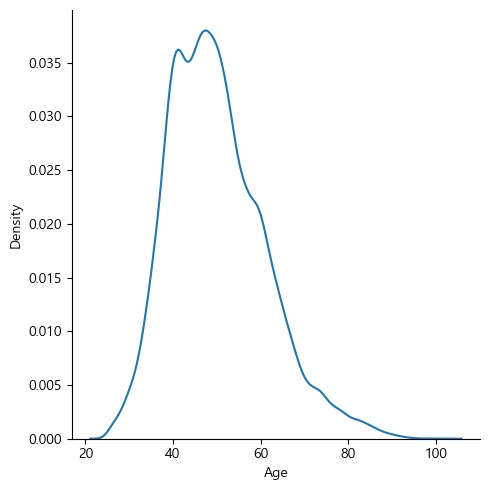

In [46]:
sns.displot(df1, x='Age',kind='kde')

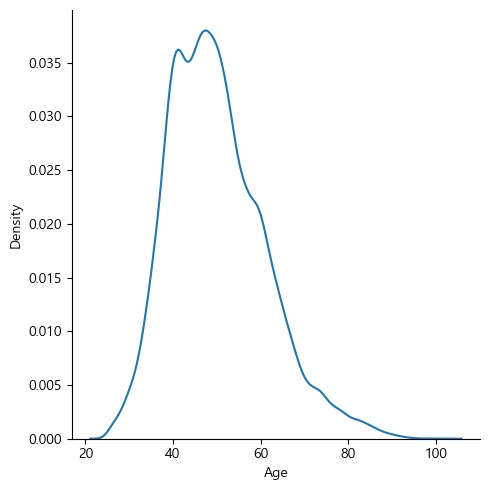

In [47]:
sns.displot(df1, x='Age',kind='kde')
plt.savefig('01_Data_Age.png')

C:\Users\campus4D046\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


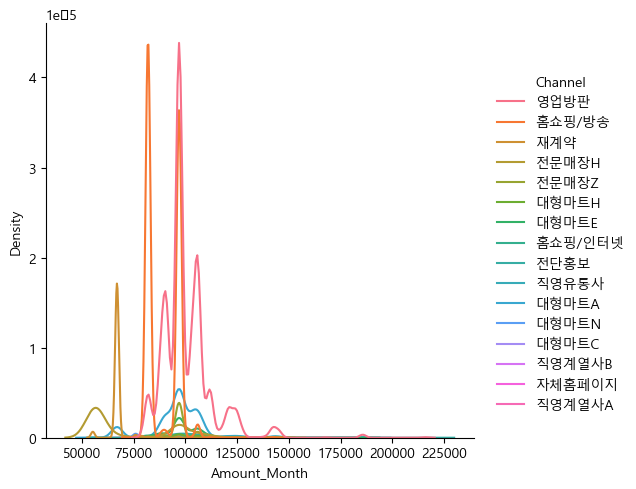

In [48]:
# hue
sns.displot(df1, x='Amount_Month',kind='kde',hue='Channel')

C:\Users\campus4D046\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


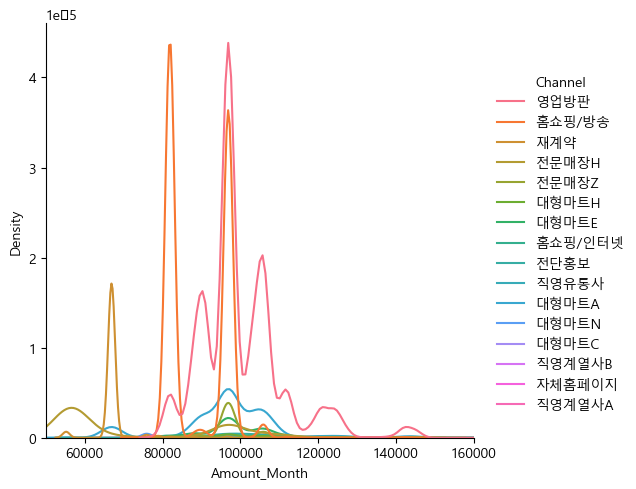

In [49]:
fig=sns.displot(df1, x='Amount_Month',kind='kde',hue='Channel')
fig.set(xlim = [50000,160000])

C:\Users\campus4D046\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\campus4D046\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


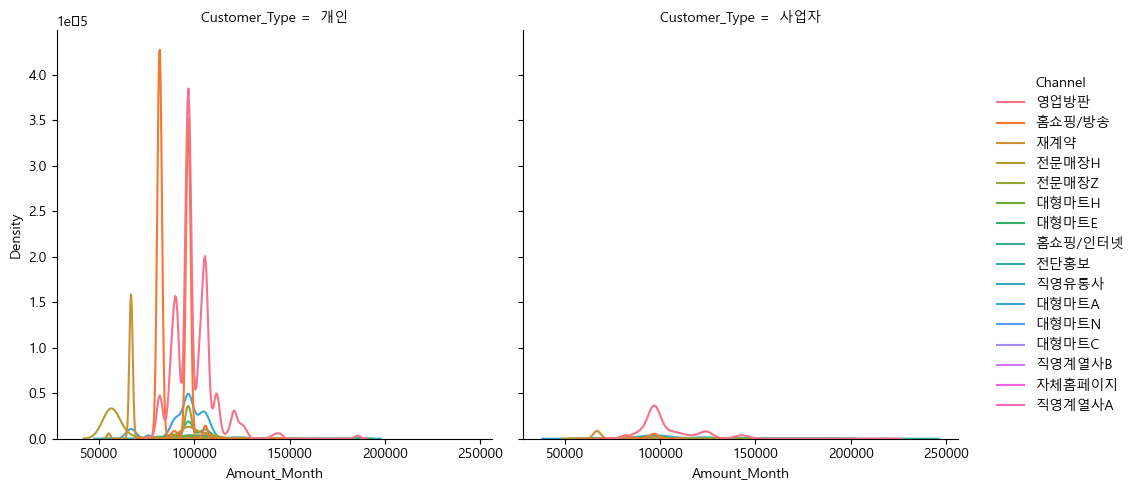

In [50]:
sns.displot(df1, x='Amount_Month',kind='kde',hue='Channel',
           col = 'Customer_Type')

<Axes: xlabel='Product_Type', ylabel='count'>

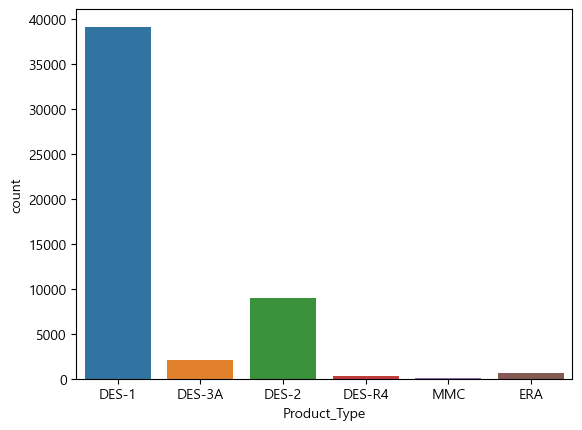

In [51]:
sns.countplot(df1, x='Product_Type')

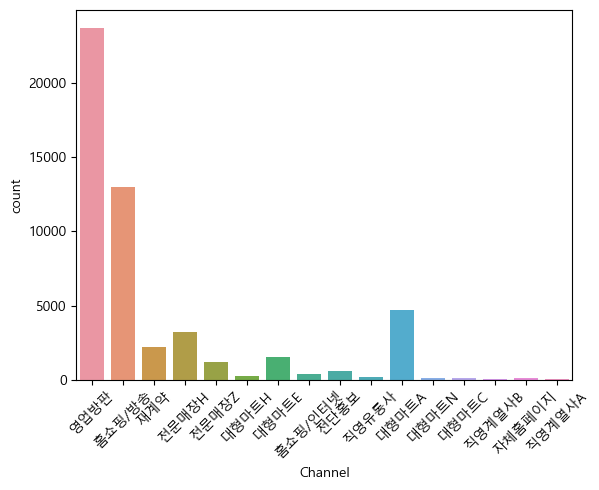

In [53]:
sns.countplot(df1, x='Channel') # 글자가 겹쳐서 안보인다

plt.xticks(rotation = 45) # 글자를 기울이면 된다.
plt.show()

<Axes: xlabel='Product_Type', ylabel='Amount_Month'>

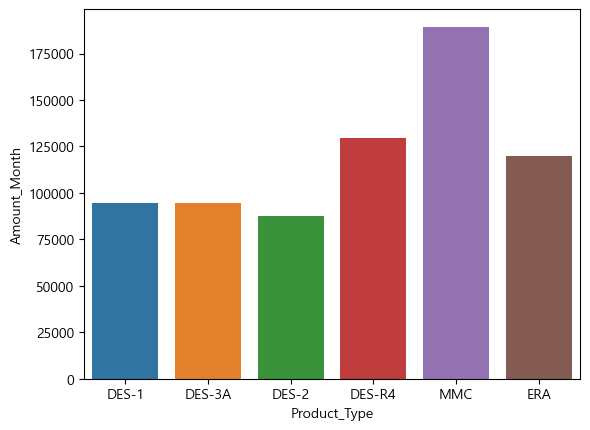

In [54]:
# 다변수
# barplot : 평균값
sns.barplot(df1 , x = 'Product_Type',y='Amount_Month',errorbar=None) # 피봇테이블의 mean을 시각화 해서 보는것과 동일

<Axes: xlabel='Product_Type', ylabel='Amount_Month'>

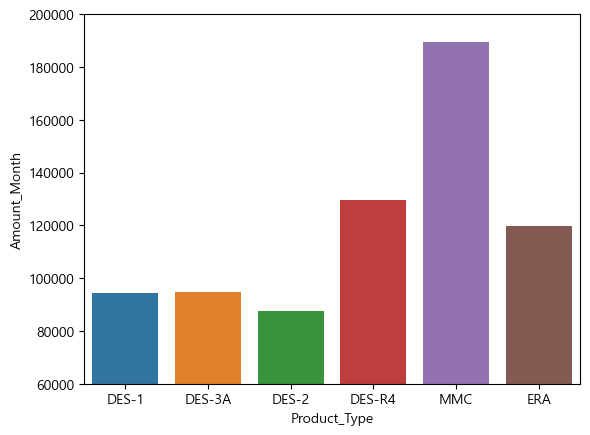

In [55]:
plt.ylim([60000,200000])
sns.barplot(df1 , x = 'Product_Type',y='Amount_Month',errorbar=None)

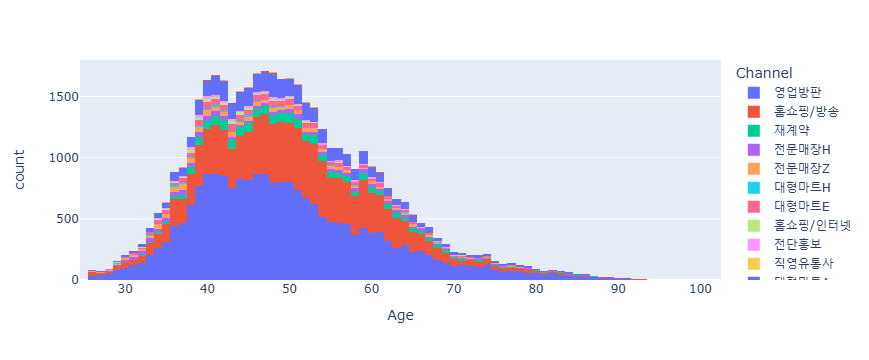

In [56]:
import plotly.express as px
px.histogram(df1, x='Age', color='Channel') # 그림을 저장하고 싶으면 카메라 버튼 클릭

In [ ]:
fig=px.histogram(df1, x='Age', color='Channel')
fig.write_html('image.html') # 동적 그래프를 그대로 저장할 수 있다.

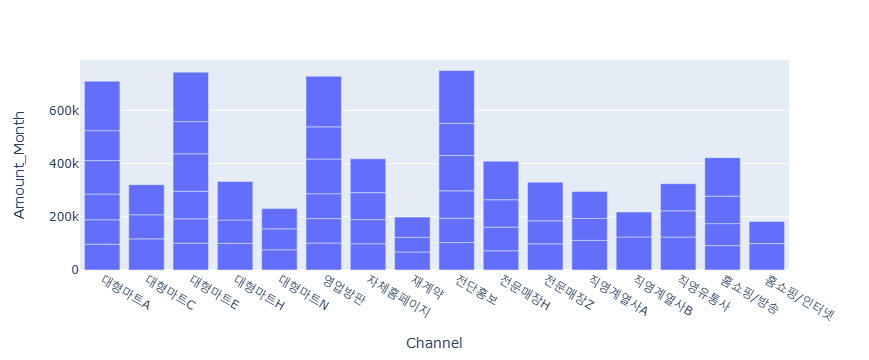

In [57]:
# express 는 피봇테이블을 직접만들어서 시긱화 해야한다.
p1 = df1.pivot_table( index = ['Channel','Product_Type'],
                    values = 'Amount_Month').reset_index()
px.bar(p1, x = 'Channel',y='Amount_Month')

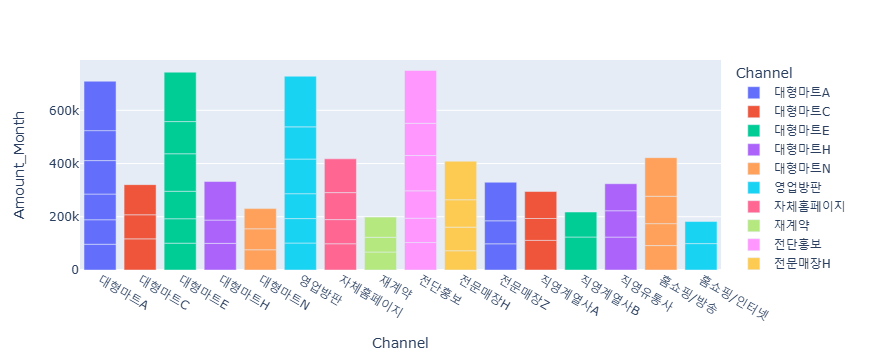

In [58]:
px.bar(p1, x = 'Channel',y='Amount_Month',color='Channel')

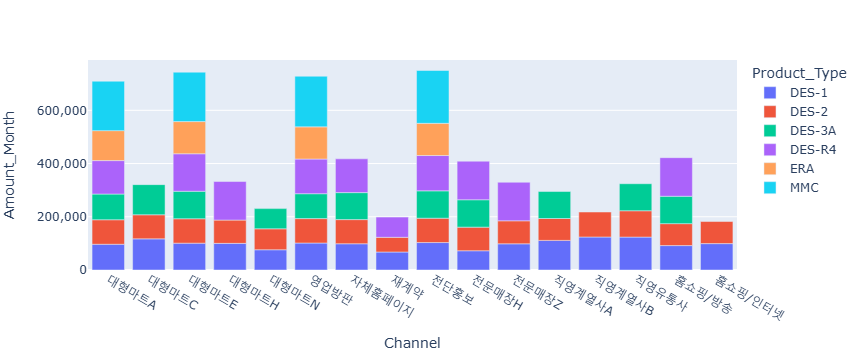

In [61]:
fig=px.bar(p1, x = 'Channel',y='Amount_Month',color='Product_Type')
fig.update_yaxes(tickformat = ',.0f')

# ,  : 천단위로 콤마 구분
# .0f : 소수점 0번째까지 표시

<Axes: xlabel='Term', ylabel='Amount_Month'>

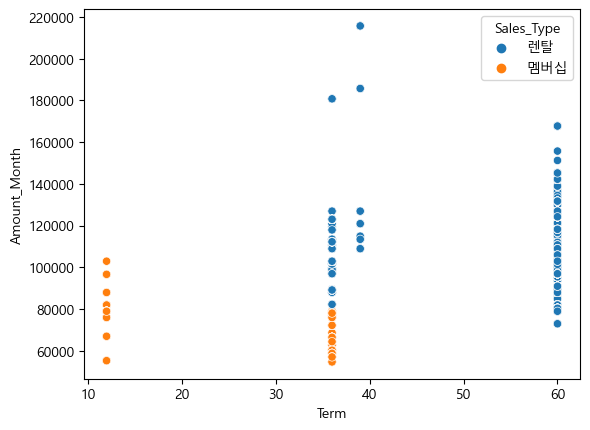

In [63]:
# 산점도 scatter 
# X : 연속형 , Y : 연속형

sns.scatterplot(df1, x='Term',y='Amount_Month',hue='Sales_Type')

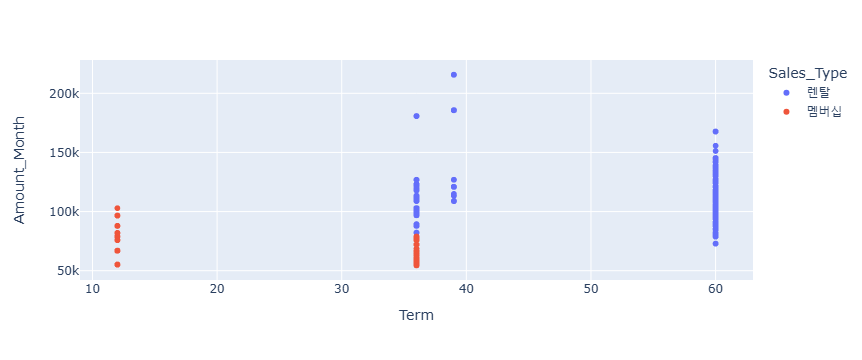

In [65]:
px.scatter(df1, x='Term',y='Amount_Month',color = 'Sales_Type')

In [67]:
# Datetime을 datetime 형식으로 변환하여 
# Datetime_dt 생성한후

# 피봇테이블 사용해서 Datetime_dt 별 Amount_Month 의 합을
# px.line으로 시각화

In [68]:
df1['Datetime_dt']=pd.to_datetime(df1['Datetime']) 
# 판다스에서 to_datetime 함수를 사용하여 df1의 Datetime의 엔티티를 날짜로 인식한다
df1.head(1)

Index  Member_ID Sales_Type Contract_Type Channel    Datetime  Term  \
0      1   66758234         렌탈          일반계약    영업방판  2022-05-05    60   

  Payment_Type Product_Type  Amount_Month  ...   Age  Address1 Address2 State  \
0          CMS        DES-1         96900  ... 42.00       경기도      경기도  계약확정   

  Overdue_count  Overdue_Type Gender Credit_Rank   Bank Datetime_dt  
0             0            없음     여자        9.00  새마을금고  2022-05-05  

[1 rows x 21 columns]

In [75]:
p1=df1.pivot_table( index='Datetime_dt', values = 'Amount_Month', aggfunc='sum').reset_index()  
#reset_index를 꼭 해줘야 컬럼으로 들어가기 때문에 
# 시각화 하려면 꼭 reset_index()를 해줘야한다.
p1

Datetime_dt  Amount_Month
0    2021-12-31       4556400
1    2022-01-01       5024700
2    2022-01-02       7267200
3    2022-01-03       5410500
4    2022-01-04       5505450
..          ...           ...
572  2023-08-03       3145539
573  2023-08-04       2858343
574  2023-08-05       3279642
575  2023-08-06       2770758
576  2023-08-07       2169843

[577 rows x 2 columns]

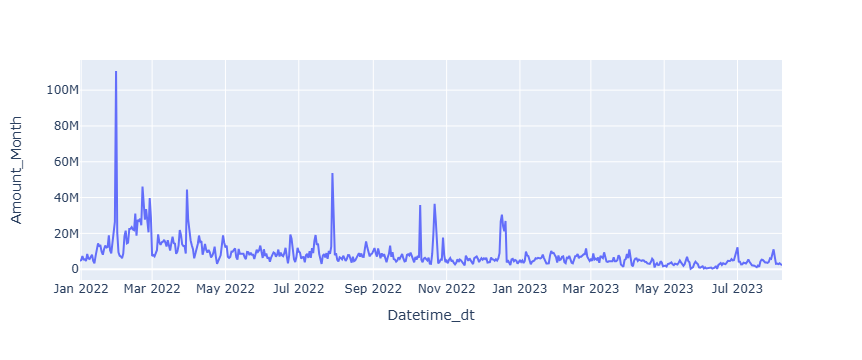

In [78]:
px.line(p1, x='Datetime_dt',y='Amount_Month')

# 미션풀이
데이터가 병합된 Merge_Data.csv 를 df2로 선언해 사용

시각화는 seaborn를 사용하여 시각화

소매점 판매 데이터의 고객에 대한 분석을 수행하고자 한다

In [79]:
df2

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액  \
0              0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230   
1              1  2102  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71  2095860   
2              2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550   
3              3  2104  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49  6289495   
4              4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930   
...          ...   ...   ... ..  ...              ...   ...  ..      ...   
4280        4280  6492  정상회원  여   미혼   경기 성남시 분당구 판교동  1963  55    51550   
4281        4281  6493  정상회원  여   기혼  서울 관악구 행운동 1681  1982  36    22500   
4282        4282  6494  정상회원  남   기혼   경기 성남시 분당구 백현동  1975  43    18500   
4283        4283  6495  정상회원  여   기혼  서울 용산구 한남동 737-  1961  57     5300   
4284        4284  6496  정상회원  여   미혼   경기 수원시 영통구 이의동  1971  47    69220   

       총구매수량  총방문횟수  
0     382.00     86  
1     472.50     79  
2    1675.40    126  
3    1401.80    125  
4     602.00     57  
...      ...    ...  
4280   10.00      1  
4281    3.00      1  
4282    3.00      1  
4283    1.00      1  
4284    8.00      1  

[4285 rows x 11 columns]

In [80]:
# 1. 앞서 병합한 df2 데이터를 이용해, '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여, result_member_vip.xlsx로 저장 하시오.

# 정렬 . sort_values
df2.sort_values(by='총구매금액' , ascending=False).head(100).o_excel('result_member_vip.xlsx')


Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령     총구매금액  \
133          133  2249  정상회원  여  NaN  경기 용인시 수지구 풍덕천2  1971  47  22346350   
156          156  2277  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1971  47  21950630   
2857        2857  5068    탈퇴  여   기혼   경기 용인시 수지구 동천동  1971  47  21285710   
3645        3645  5856    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1972  46  21217470   
327          327  2472  정상회원  여   미혼  경기 용인시 수지구 풍덕천2  1974  44  20191005   
...          ...   ...   ... ..  ...              ...   ...  ..       ...   
38            38  2140  정상회원  여   기혼  경기 용인시 수지구 풍덕천1  1965  53   7708970   
375          375  2524  정상회원  여   미혼  경기 용인시 수지구 풍덕천1  1972  46   7703060   
311          311  2453  정상회원  여   미혼  경기 용인시 수지구 상현2동  1977  41   7663730   
3866        3866  6078    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1979  39   7644660   
217          217  2344  정상회원  여   기혼   경기 용인시 수지구 신봉동  1976  42   7601560   

       총구매수량  총방문횟수  
133  4373.60    174  
156  4425.70    170  
2857 4180.50    170  
3645 4006.96    172  
327  4044.20    167  
...      ...    ...  
38   1157.20    113  
375  1745.50    147  
311  1566.50    146  
3866 1651.84    132  
217  1717.50    123  

[100 rows x 11 columns]

In [ ]:
df2['총구매금액'].sort_values() 
# 이렇게 하면 데이터 프레임 형태로 추출할 수 없다.

In [81]:
# 2. 회원 '성별'에 따른 '총구매금액'의 합을 비교하고자 한다. 
# '성별' 별 '총구매금액'의 합을 Table로 계산하시오.

df2.pivot_table( index='성별', values='총구매금액',aggfunc='sum')

총구매금액
성별            
남    250926387
여   3925957601

In [82]:
# 3. '결혼유무'에서 '기혼'에 해당하는 고객들 중 
# '총방문횟수'가 높은 상위 30명의 고객명단을 확인 하시오.

df2['결혼유무'].unique()

array(['기혼', nan, '미혼'], dtype=object)

In [83]:
cond1 = df2['결혼유무'] =='기혼'
p1 = df2.loc[cond1]
p1.head()

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액   총구매수량  \
0           0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230  382.00   
2           2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550 1675.40   
4           4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930  602.00   
6           6  2107  정상회원  여   기혼   경기 용인시 수지구 신봉동  1941  77  7161860 1419.75   
9           9  2110  정상회원  여   기혼   경기 용인시 수지구 신봉동  1965  53  5549725 1204.10   

   총방문횟수  
0     86  
2    126  
4     57  
6    143  
9    145

In [85]:
p1.sort_values( by = '총방문횟수',ascending=False).head(30)

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령     총구매금액  \
39            39  2141  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1968  50  15302800   
3645        3645  5856    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1972  46  21217470   
2441        2441  4649    탈퇴  여   기혼  경기 용인시 수지구 풍덕천2  1972  46  16471290   
2857        2857  5068    탈퇴  여   기혼   경기 용인시 수지구 동천동  1971  47  21285710   
1928        1928  4135    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1969  49  18381620   
156          156  2277  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1971  47  21950630   
142          142  2260  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1977  41  18681595   
166          166  2288  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1968  50  17170370   
103          103  2214  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1976  42  14895300   
372          372  2521  정상회원  여   기혼   경기 용인시 수지구 신봉동  1974  44  13609730   
202          202  2329  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1962  56   5575655   
113          113  2229  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1976  42  13395720   
233          233  2363  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1971  47  10033855   
479          479  2637    탈퇴  남   기혼  서울 중구 장충동1가 31-  1983  35  19646542   
1012        1012  3203    탈퇴  여   기혼   경기 용인시 수지구 동천동  1970  48  13786410   
307          307  2449  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1973  45   8853580   
144          144  2263  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1967  51  11917750   
692          692  2871  정상회원  여   기혼   경기 용인시 수지구 성복동  1970  48  15670140   
262          262  2397  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1969  49   9319260   
186          186  2310  정상회원  여   기혼  경기 용인시 수지구 풍덕천2  1975  43   8750730   
806          806  2992  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1969  49   9183600   
2698        2698  4909    탈퇴  여   기혼  경기 용인시 수지구 풍덕천2  1979  39   5655670   
3487        3487  5698    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1973  45   9511415   
9              9  2110  정상회원  여   기혼   경기 용인시 수지구 신봉동  1965  53   5549725   
6              6  2107  정상회원  여   기혼   경기 용인시 수지구 신봉동  1941  77   7161860   
297          297  2437  정상회원  여   기혼  경기 용인시 수지구 풍덕천1  1973  45   5653580   
2199        2199  4406    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1977  41  12824280   
1421        1421  3626    탈퇴  여   기혼   경기 용인시 수지구 신봉동  1971  47   9143295   
707          707  2887  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1980  38   4713990   
130          130  2246  정상회원  여   기혼  경기 용인시 수지구 풍덕천동  1978  40   7963710   

       총구매수량  총방문횟수  
39   2896.70    173  
3645 4006.96    172  
2441 3447.20    171  
2857 4180.50    170  
1928 3219.43    170  
156  4425.70    170  
142  3870.15    169  
166  2921.50    166  
103  2986.40    162  
372  2985.55    161  
202  1280.60    160  
113  2647.50    159  
233  2088.85    158  
479  3566.35    156  
1012 2785.40    155  
307  2048.35    153  
144  2279.30    152  
692  2834.65    152  
262  1687.80    152  
186  1686.00    151  
806  1900.20    149  
2698 1426.30    147  
3487 2024.37    146  
9    1204.10    145  
6    1419.75    143  
297  1135.10    139  
2199 2831.30    139  
1421 1775.23    138  
707  1144.10    137  
130  1684.00    136

In [86]:
# 4. '연령'을 이용해, 고객 '연령대'를 계산하고, 
#'총구매금액'의 합이 가장 높은 2개의 '연령대'를 확인하여, 
#두 연령대 간의 '총구매금액'의 평균의 차이를 계산 하시오.

# 연령대 생성
df2['연령'].describe()


count   4285.00
mean      51.01
std       12.87
min       23.00
25%       41.00
50%       49.00
75%       60.00
max      107.00
Name: 연령, dtype: float64

In [88]:
row=df2['연령'][0]
row

51

In [89]:
str(row)[0] # int를 str 으로 바꾸어 [0] 즉 10의 자리만 가져올 수 있게 만든다

'5'

In [90]:
str(row)[0]+'0대'

'50대'

In [91]:
def func4(row):
    if row >= 80:
        return '80세 이상'
    else : 
        return str(row)[0]+'0대'

df2['연령대'] = df2['연령'].apply(func4)

In [92]:
df2[['연령','연령대']].head()

연령  연령대
0  51  50대
1  71  70대
2  46  40대
3  49  40대
4  70  70대

In [94]:
df2['연령대'].value_counts()

연령대
40대       1326
50대        919
30대        882
60대        676
70대        368
80세 이상      80
20대         34
Name: count, dtype: int64

In [98]:
# 총구매금액이 높은 두 연령대를 확인
p1=df2.pivot_table( index = '연령대',values = '총구매금액' , aggfunc='sum').reset_index().sort_values( by ='총구매금액' , ascending= False).head(2)
p1

연령대       총구매금액
2  40대  1679359996
3  50대   984225059

In [100]:
# 40대 1위 / 50대 2위

cond1 = df2['연령대']=='40대'
cond2 = df2['연령대']=='50대'

p1 = df2.loc[cond1]#.['총구매금액'].mean()
p2 = df2.loc[cond2]#.['총구매금액'].mean()

#p1-p2

abs(p1['총구매금액'].mean() - p2['총구매금액'].mean())

195511.71931750863

In [101]:
# 5. '회원상태'에 따른 '총구매금액'의 평균을 시각화 하시오.
df2['회원상태'].unique()

array(['정상회원', '탈퇴', '이관처리중', '탈퇴처리중'], dtype=object)

<Axes: xlabel='회원상태', ylabel='총구매금액'>

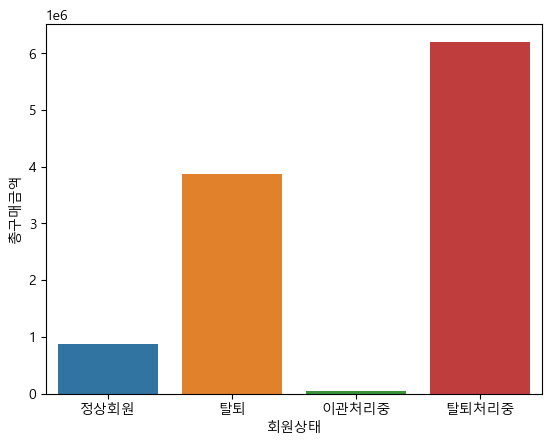

In [102]:
# X : 범주형 Y : 연속형 
# 이 범주형 ,연속형에 따라 사용하는 그래프가 있으니 숙지하여 그래프 함수를 사용해야함

sns.barplot(df2, x='회원상태' , y='총구매금액',errorbar= None)
# barplot은 평균을 보여준다

<Axes: xlabel='회원상태', ylabel='총구매금액'>

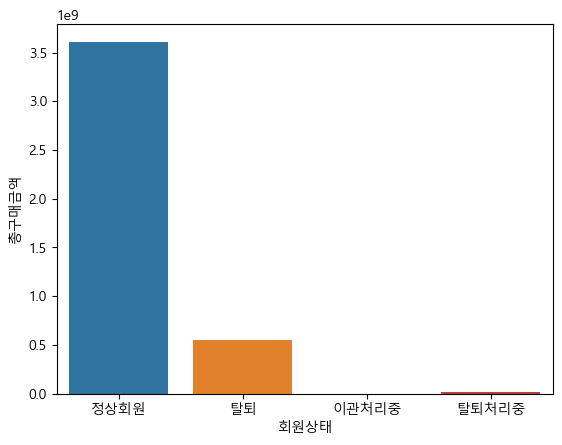

In [103]:
sns.barplot(df2, x='회원상태' , y='총구매금액',errorbar= None , estimator = sum)
# estimator = sum : 합을 보여줌

In [105]:
#6. '총구매금액'을 '총방문횟수'로 나누어, '1회방문구매평균'을 계산하고,
# 생성된 파생변수를 바탕으로 아래와 같이 고객등급을 분류하시오.
# '1회방문구매평균'이 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류
# 분류된 고객 등급은 '고객등급'이라는 새로운 파생변수로 생성

df2.head()

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액   총구매수량  \
0           0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230  382.00   
1           1  2102  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71  2095860  472.50   
2           2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550 1675.40   
3           3  2104  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49  6289495 1401.80   
4           4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930  602.00   

   총방문횟수  연령대  
0     86  50대  
1     79  70대  
2    126  40대  
3    125  40대  
4     57  70대

In [106]:
df2['1회방문구매평균'] = df2['총구매금액'] / df2['총방문횟수'] 
#'총구매금액'을 '총방문횟수'로 나누어, '1회방문구매평균'을 계산하고,
df2.head()

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액   총구매수량  \
0           0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230  382.00   
1           1  2102  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71  2095860  472.50   
2           2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550 1675.40   
3           3  2104  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49  6289495 1401.80   
4           4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930  602.00   

   총방문횟수  연령대  1회방문구매평균  
0     86  50대  23153.84  
1     79  70대  26529.87  
2    126  40대  65663.10  
3    125  40대  50315.96  
4     57  70대  53823.33

In [107]:
# '1회방문구매평균'이 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류

df2['1회방문구매평균'].head()

0   23153.84
1   26529.87
2   65663.10
3   50315.96
4   53823.33
Name: 1회방문구매평균, dtype: float64

In [109]:
def func6(row):
    if row >= 100000:
        return 'A'
    elif row >= 50000:
        return 'B'
    elif row >= 20000:
        return 'C'
    else:
        return 'D'

df2['고객등급'] = df2['1회방문구매평균'].apply(func6)
df2['고객등급'].value_counts()

고객등급
C    2006
D    1506
B     676
A      97
Name: count, dtype: int64

In [111]:
#7. 새로 생성된 파생변수 '고객등급'에서 
# '기혼'자가 가장 많은 그룹은 어디 그룹인지 확인하시오.

cond1 = (df2['고객등급'] =='A')
cond2 = (df2['고객등급'] =='B')
cond3 = (df2['고객등급'] =='C')
cond4 = (df2['고객등급'] =='D')

cond5 = df2['결혼유무'] =='기혼'

print(df2.loc[cond1 & cond5].shape[0])
print(df2.loc[cond2 & cond5].shape[0])
print(df2.loc[cond3 & cond5].shape[0])
print(df2.loc[cond4 & cond5].shape[0])

# C가 제일 많다. 이 방법은 귀찮다. 크로스 테이블을 사용하는 방법이 간단하다.

50
315
812
598


In [114]:
# 크로스 테이블
pd.crosstab(df2['고객등급'],df2['결혼유무'])

결혼유무   기혼   미혼
고객등급          
A      50   28
B     315  226
C     812  751
D     598  580

In [115]:
# 8. df2 데이터에서 '주소'데이터를 바탕으로, "시" 별 '지역(시)'이라는 이름의 새로운 파생변수를 생성 하시오.
# 서울시 / 용인시 / 성남시 /수원시 /광주시 / 나머지 지역은 기타로 분류

df2.head()

Unnamed: 0  회원번호  회원상태 성별 결혼유무               주소    생년  연령    총구매금액   총구매수량  \
0           0  2101  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51  1991230  382.00   
1           1  2102  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71  2095860  472.50   
2           2  2103  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46  8273550 1675.40   
3           3  2104  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49  6289495 1401.80   
4           4  2105  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70  3067930  602.00   

   총방문횟수  연령대  1회방문구매평균 고객등급  
0     86  50대  23153.84    C  
1     79  70대  26529.87    C  
2    126  40대  65663.10    B  
3    125  40대  50315.96    B  
4     57  70대  53823.33    B

In [207]:
def func8(row):
    if '서울' in row:
        return '서울시'
    elif '용인' in row :
        return '용인시'
    elif '성남' in row :
        return '성남시'
    elif '수원' in row :
        return '수원시'
    elif '광주' in row :
        return '광주시'
    else:
        return '기타'

df2['지역(시)'] = df2['주소'].apply(func8)
df2['지역(시)'].value_counts()

지역(시)
용인시    2167
서울시     754
기타      549
성남시     547
수원시     206
광주시      62
Name: count, dtype: int64

In [206]:
list1=['서울','용인','성남','수원','광주']

def func88(row):
    for i in list1:
        if i in row:
            return i + '시'
    else:
        return '기타'
      

df2['지역(시)2'] = df2['주소'].apply(func88)
df2['지역(시)2'].value_counts()

지역(시)2
용인시    2167
서울시     754
기타      549
성남시     547
수원시     206
광주시      62
Name: count, dtype: int64

In [117]:
# 9. '고객등급'을 입력했을 때, 해당 고객등급에서 
#'성별'에 따른 '총구매금액' 기술통계량을 계산하여 
# 'result9_등급명.xlsx'저장하는 프로그램을 구성 하시오.

rank = input('고객등급을 입력하시오')

cond1 = (df2['고객등급'] ==rank)
p1 = df2.loc[cond1]

p2=p1.pivot_table(index = '성별', values='총구매금액', aggfunc='describe')
p2.to_excel(f'result9_{rank}.xlsx')

고객등급을 입력하시오 A


25%       50%        75%  count         max       mean       min  \
성별                                                                          
남  168975.00 898580.00 2830270.00  15.00 19646542.00 2475759.13 101600.00   
여  134575.00 269225.00 2466330.00  82.00 22346350.00 3514785.55 101250.00   

          std  
성별             
남  4950399.97  
여  6613487.62

In [118]:
def func9():
    rank = input('고객등급을 입력하시오')
    cond1 = (df2['고객등급'] ==rank)
    p1 = df2.loc[cond1]
    
    p2=p1.pivot_table(index = '성별', values='총구매금액', aggfunc='describe')
    p2.to_excel(f'result9_{rank}.xlsx')
    return p2

func9()

고객등급을 입력하시오 A


25%       50%        75%  count         max       mean       min  \
성별                                                                          
남  168975.00 898580.00 2830270.00  15.00 19646542.00 2475759.13 101600.00   
여  134575.00 269225.00 2466330.00  82.00 22346350.00 3514785.55 101250.00   

          std  
성별             
남  4950399.97  
여  6613487.62

In [119]:
# 10. df_product데이터의 구조와 타입을 확인 하시오

df_product = pd.read_csv('06_store_product.csv')
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [137]:
# 11. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 추출하여,
#df_product_top이라는 변수로 선언하고, 
#df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산 하시오.

df_product['물품대분류'].value_counts().head(3)

물품대분류
채소     193170
축산물    134486
간식     111411
Name: count, dtype: int64

In [146]:
top3_list = df_product['물품대분류'].value_counts().head(3).index
top3_list

Index(['채소', '축산물', '간식'], dtype='object', name='물품대분류')

In [145]:
cond1 = df_product['물품대분류'].isin(top3_list)

df_product_top = df_product.loc[cond1]
# index로 뽑은 후 isin으로 조건을 만든다
df_product_top.pivot_table(index= '구매매장',values = '구매금액', aggfunc = ['sum','mean'])

sum    mean
           구매금액    구매금액
구매매장                   
매장1   363985400 4770.64
매장2   461745602 4908.27
매장3   916748142 4949.91
매장4   419048570 5019.15

In [140]:
# 13. 공급일자'데이터를 날짜형식으로 변환하여,
# '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.
df_product['공급일자_dt'] = pd.to_datetime(df_product['공급일자'],format = '%Y%m%d') 
# 두글자일때 소문자 대문자일 때 4글자
df_product

공급일자       물품코드 물품대분류   물품중분류     물품소분류                물품명  구매수량  \
0       20170201   50142001    채소  잎/줄기채소       시금치          시금치(300g)  1.00   
1       20170201   60302012   축산물     육가공  돈가스/분쇄가공       튀김옷돈가스(400g)  1.00   
2       20170201   80301002    간식     밀가공        라면      감자라면(110g:1봉)  2.00   
3       20170201   80301010    간식     밀가공        라면          사리면(100g)  1.00   
4       20170201   80305003    간식     밀가공        만두         고기만두(500g)  1.00   
...          ...        ...   ...     ...       ...                ...   ...   
735778  20170630  100201003    반찬   두부/유부        두부        두부(1모:420g)  1.00   
735779  20170630  100306006    반찬    즉석조리      간편요리        현미쌀가스(320g)  1.00   
735780  20170630  130214027  생활용품    생활용품    기타생활용품       모기기피제(로즈마리향)  1.00   
735781  20170630  130501098  생활용품     화장품     기초화장품    수피아 알로에베라잎즙 수딩젤  1.00   
735782  20170630  110102066    음료      음료        과즙  감귤즙(유기/150ml*10봉)  1.00   

         구매금액 구매매장  반품_원거래일자    회원번호    공급일자_dt    연도  월         요일  
0        2000  매장3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
1        6300  매장3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
2        2600  매장3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
3         900  매장3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
4        5400  매장3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
...       ...  ...       ...     ...        ...   ... ..        ...  
735778   2200  매장3       NaN 2637.00 2017-06-30  2017  6     Friday  
735779   5830  매장3       NaN 2637.00 2017-06-30  2017  6     Friday  
735780   8470  매장3       NaN 2637.00 2017-06-30  2017  6     Friday  
735781   7370  매장3       NaN 2637.00 2017-06-30  2017  6     Friday  
735782  10450  매장4       NaN 2637.00 2017-06-30  2017  6     Friday  

[735783 rows x 15 columns]

In [131]:
df_product['연도'] = df_product['공급일자_dt'].dt.year
df_product['월'] = df_product['공급일자_dt'].dt.month
df_product['요일'] = df_product['공급일자_dt'].dt.day_name()

df_product.head()

공급일자      물품코드 물품대분류   물품중분류     물품소분류            물품명  구매수량  구매금액 구매매장  \
0  20170201  50142001    채소  잎/줄기채소       시금치      시금치(300g)  1.00  2000  매장3   
1  20170201  60302012   축산물     육가공  돈가스/분쇄가공   튀김옷돈가스(400g)  1.00  6300  매장3   
2  20170201  80301002    간식     밀가공        라면  감자라면(110g:1봉)  2.00  2600  매장3   
3  20170201  80301010    간식     밀가공        라면      사리면(100g)  1.00   900  매장3   
4  20170201  80305003    간식     밀가공        만두     고기만두(500g)  1.00  5400  매장3   

   반품_원거래일자    회원번호    공급일자_dt    연도  월         요일  
0       NaN 2101.00 2017-02-01  2017  2  Wednesday  
1       NaN 2101.00 2017-02-01  2017  2  Wednesday  
2       NaN 2101.00 2017-02-01  2017  2  Wednesday  
3       NaN 2101.00 2017-02-01  2017  2  Wednesday  
4       NaN 2101.00 2017-02-01  2017  2  Wednesday

In [148]:
# 13. '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오
df_product.pivot_table(index='물품대분류',values = '구매금액',aggfunc='sum',
                      columns = '월' , fill_value = 0).to_excel('result8.xlsx')

월              1          2          3          4          5          6
물품대분류                                                                  
간식      83859470   71251375   72170465   70660080   71680155   78346946
건강      35891780   22961390   31185220   29584370   28711570   23418244
과실      59004590   41991101   39356364   34464440   26769710   32265420
급식용            0          0          0          0          0          0
기타             0          0          0          0          0          0
반찬      51215050   39693450   49572430   43759830   42773580   46789020
베이커리        4800          0          0          0          0          0
생활용품    36247670   35709810   52518770   45890520   38928265   40105510
서류       8844300    9466150   11006950    7227100    7672440    8752440
수산      78142080   55114410   63767950   59544090   50530065   54333530
양념/가루   48352890   47935440   48135260   40487070   44017738   51126580
음료      30265700   21211240   28628400   29411680   29671415   38875352
잡곡      10921400   13944600   11105900    9596800    8822800    9861120
주곡      23087900   21560400   26446700   25019500   23107130   23827320
주류       1316950    1052300    1160450    1145300     959300    1251030
채소      91066225   81147475   96970600   98635620  109519818  120914240
축산물    188293390  163340810  199143950  186156660  193004435  185366000

In [149]:
# 14. '요일'에서 '주말'과'주중'을 구분하여, '주중'과 '주말'의 구매수량의 합을 확인하시오.
df_product['요일'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [152]:
list1 = ['주중','주중','주중','주말','주말','주중','주중']
list2 = df_product['요일'].unique()

dict1 = dict(zip(list2,list1))
dict1

{'Wednesday': '주중',
 'Thursday': '주중',
 'Friday': '주중',
 'Saturday': '주말',
 'Sunday': '주말',
 'Monday': '주중',
 'Tuesday': '주중'}

In [153]:
df_product['주말구분'] = df_product['요일'].replace(dict1)
df_product['주말구분'].value_counts()

주말구분
주중    583714
주말    152069
Name: count, dtype: int64

In [155]:
def dayfunc(row):
    if row =='Sunday' or row =='Saturday' :
        return '주말'
    else : 
        return '주중'

df_product['주말구분2'] = df_product['요일'].apply(dayfunc)
df_product['주말구분2'].value_counts()

주말구분2
주중    583714
주말    152069
Name: count, dtype: int64

# 각 회원별 '물품대분류' 에서 각 물품을 어느 정도 비중으로 구매했는지 계산하고자 한다.

- df_product 에서 , '물품대분류'의 항목을 확인하고, ' 회원' 별 '물품대분류'의 구매수량을 계산한 후,

- 한명의 회원이 구매한 전체 수량으로 나누어 각 품목 별 구매 비율을 계산해
- df2(Merge_Date.csv)에 병합하시. 

In [193]:
p1=df_product.pivot_table( index='회원번호', values = '구매수량',
                      columns = '물품대분류',aggfunc='sum' , fill_value=0
                         ,margins = True).reset_index()
p1

물품대분류    회원번호        간식      건강       과실  급식용    기타        반찬  베이커리     생활용품  \
0     2101.00     30.00   18.00     3.00 0.00  0.00     67.00  0.00     8.00   
1     2102.00    149.00    0.00    29.50 0.00  0.00     56.00  0.00     3.00   
2     2103.00    283.70   17.70    47.00 0.00  0.00    213.00  0.00    59.00   
3     2104.00    232.00    3.20    54.00 0.00  0.00    200.00  0.00    26.00   
4     2105.00     89.00   12.00    31.00 0.00  0.00     76.00  0.00     9.00   
...       ...       ...     ...      ...  ...   ...       ...   ...      ...   
4281  6493.00      0.00    0.00     0.00 0.00  0.00      0.00  0.00     0.00   
4282  6494.00      0.00    0.00     0.00 0.00  0.00      3.00  0.00     0.00   
4283  6495.00      0.00    0.00     1.00 0.00  0.00      0.00  0.00     0.00   
4284  6496.00      1.00    0.00     0.00 0.00  0.00      0.00  0.00     2.00   
4285      All 137425.30 6492.80 21637.95 0.00 63.00 113665.00  1.00 30215.10   

물품대분류       서류       수산    양념/가루       음료      잡곡       주곡     주류        채소  \
0         6.00     4.00    15.00    10.00    5.00     2.00   0.00    118.00   
1        11.00    24.00    17.00     7.00    5.00    16.00   0.00    104.00   
2        21.00   158.00    62.00    69.00   14.00    12.00   3.00    469.00   
3        17.00   119.00    59.00    35.60   13.00    16.00   1.00    409.00   
4        15.00    29.00    25.00    35.00   14.00     6.00   0.00    164.00   
...        ...      ...      ...      ...     ...      ...    ...       ...   
4281      0.00     0.00     2.00     0.00    0.00     0.00   0.00      0.00   
4282      0.00     0.00     0.00     0.00    0.00     0.00   0.00      0.00   
4283      0.00     0.00     0.00     0.00    0.00     0.00   0.00      0.00   
4284      0.00     1.00     0.00     2.00    0.00     0.00   0.00      1.00   
4285  12665.70 58195.60 38537.50 43552.70 9583.00 10249.50 935.50 210661.70   

물품대분류       축산물       All  
0         96.00    382.00  
1         51.00    472.50  
2        247.00   1675.40  
3        217.00   1401.80  
4         97.00    602.00  
...         ...       ...  
4281       1.00      3.00  
4282       0.00      3.00  
4283       0.00      1.00  
4284       1.00      8.00  
4285  155180.75 849062.10  

[4286 rows x 19 columns]

In [194]:
# 간식,건강,과실,급식용,기타	,반찬,베이커리,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
p1['간식'] / p1['All']

p2 = p1.iloc[ :-1]
p2

물품대분류    회원번호     간식    건강    과실  급식용   기타     반찬  베이커리  생활용품    서류     수산  \
0     2101.00  30.00 18.00  3.00 0.00 0.00  67.00  0.00  8.00  6.00   4.00   
1     2102.00 149.00  0.00 29.50 0.00 0.00  56.00  0.00  3.00 11.00  24.00   
2     2103.00 283.70 17.70 47.00 0.00 0.00 213.00  0.00 59.00 21.00 158.00   
3     2104.00 232.00  3.20 54.00 0.00 0.00 200.00  0.00 26.00 17.00 119.00   
4     2105.00  89.00 12.00 31.00 0.00 0.00  76.00  0.00  9.00 15.00  29.00   
...       ...    ...   ...   ...  ...  ...    ...   ...   ...   ...    ...   
4280  6492.00   0.00  0.00  0.00 0.00 0.00   2.00  0.00  7.00  0.00   0.00   
4281  6493.00   0.00  0.00  0.00 0.00 0.00   0.00  0.00  0.00  0.00   0.00   
4282  6494.00   0.00  0.00  0.00 0.00 0.00   3.00  0.00  0.00  0.00   0.00   
4283  6495.00   0.00  0.00  1.00 0.00 0.00   0.00  0.00  0.00  0.00   0.00   
4284  6496.00   1.00  0.00  0.00 0.00 0.00   0.00  0.00  2.00  0.00   1.00   

물품대분류  양념/가루    음료    잡곡    주곡   주류     채소    축산물     All  
0      15.00 10.00  5.00  2.00 0.00 118.00  96.00  382.00  
1      17.00  7.00  5.00 16.00 0.00 104.00  51.00  472.50  
2      62.00 69.00 14.00 12.00 3.00 469.00 247.00 1675.40  
3      59.00 35.60 13.00 16.00 1.00 409.00 217.00 1401.80  
4      25.00 35.00 14.00  6.00 0.00 164.00  97.00  602.00  
...      ...   ...   ...   ...  ...    ...    ...     ...  
4280    0.00  0.00  0.00  0.00 0.00   1.00   0.00   10.00  
4281    2.00  0.00  0.00  0.00 0.00   0.00   1.00    3.00  
4282    0.00  0.00  0.00  0.00 0.00   0.00   0.00    3.00  
4283    0.00  0.00  0.00  0.00 0.00   0.00   0.00    1.00  
4284    0.00  2.00  0.00  0.00 0.00   1.00   1.00    8.00  

[4285 rows x 19 columns]

In [195]:
p2.columns

Index(['회원번호', '간식', '건강', '과실', '급식용', '기타', '반찬', '베이커리', '생활용품', '서류', '수산',
       '양념/가루', '음료', '잡곡', '주곡', '주류', '채소', '축산물', 'All'],
      dtype='object', name='물품대분류')

In [196]:
for i in p2.columns[1:-1]:
    p2[i+'_rate']= p2[i]/p2['All'] #과부하 오류

C:\Users\campus4D046\AppData\Local\Temp\ipykernel_3216\3620706263.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\campus4D046\AppData\Local\Temp\ipykernel_3216\3620706263.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\campus4D046\AppData\Local\Temp\ipykernel_3216\3620706263.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [198]:
p2

물품대분류    회원번호     간식    건강    과실  급식용   기타     반찬  베이커리  생활용품    서류  ...  \
0     2101.00  30.00 18.00  3.00 0.00 0.00  67.00  0.00  8.00  6.00  ...   
1     2102.00 149.00  0.00 29.50 0.00 0.00  56.00  0.00  3.00 11.00  ...   
2     2103.00 283.70 17.70 47.00 0.00 0.00 213.00  0.00 59.00 21.00  ...   
3     2104.00 232.00  3.20 54.00 0.00 0.00 200.00  0.00 26.00 17.00  ...   
4     2105.00  89.00 12.00 31.00 0.00 0.00  76.00  0.00  9.00 15.00  ...   
...       ...    ...   ...   ...  ...  ...    ...   ...   ...   ...  ...   
4280  6492.00   0.00  0.00  0.00 0.00 0.00   2.00  0.00  7.00  0.00  ...   
4281  6493.00   0.00  0.00  0.00 0.00 0.00   0.00  0.00  0.00  0.00  ...   
4282  6494.00   0.00  0.00  0.00 0.00 0.00   3.00  0.00  0.00  0.00  ...   
4283  6495.00   0.00  0.00  1.00 0.00 0.00   0.00  0.00  0.00  0.00  ...   
4284  6496.00   1.00  0.00  0.00 0.00 0.00   0.00  0.00  2.00  0.00  ...   

물품대분류  생활용품_rate  서류_rate  수산_rate  양념/가루_rate  음료_rate  잡곡_rate  주곡_rate  \
0           0.02     0.02     0.01        0.04     0.03     0.01     0.01   
1           0.01     0.02     0.05        0.04     0.01     0.01     0.03   
2           0.04     0.01     0.09        0.04     0.04     0.01     0.01   
3           0.02     0.01     0.08        0.04     0.03     0.01     0.01   
4           0.01     0.02     0.05        0.04     0.06     0.02     0.01   
...          ...      ...      ...         ...      ...      ...      ...   
4280        0.70     0.00     0.00        0.00     0.00     0.00     0.00   
4281        0.00     0.00     0.00        0.67     0.00     0.00     0.00   
4282        0.00     0.00     0.00        0.00     0.00     0.00     0.00   
4283        0.00     0.00     0.00        0.00     0.00     0.00     0.00   
4284        0.25     0.00     0.12        0.00     0.25     0.00     0.00   

물품대분류  주류_rate  채소_rate  축산물_rate  
0         0.00     0.31      0.25  
1         0.00     0.22      0.11  
2         0.00     0.28      0.15  
3         0.00     0.29      0.15  
4         0.00     0.27      0.16  
...        ...      ...       ...  
4280      0.00     0.10      0.00  
4281      0.00     0.00      0.33  
4282      0.00     0.00      0.00  
4283      0.00     0.00      0.00  
4284      0.00     0.12      0.12  

[4285 rows x 36 columns]

In [203]:
# 리스트 컴프리헨션
p3= p2[[x for x in p2.columns if '_rate' in x] + ['회원번호']]
p3

물품대분류  간식_rate  건강_rate  과실_rate  급식용_rate  기타_rate  반찬_rate  베이커리_rate  \
0         0.08     0.05     0.01      0.00     0.00     0.18       0.00   
1         0.32     0.00     0.06      0.00     0.00     0.12       0.00   
2         0.17     0.01     0.03      0.00     0.00     0.13       0.00   
3         0.17     0.00     0.04      0.00     0.00     0.14       0.00   
4         0.15     0.02     0.05      0.00     0.00     0.13       0.00   
...        ...      ...      ...       ...      ...      ...        ...   
4280      0.00     0.00     0.00      0.00     0.00     0.20       0.00   
4281      0.00     0.00     0.00      0.00     0.00     0.00       0.00   
4282      0.00     0.00     0.00      0.00     0.00     1.00       0.00   
4283      0.00     0.00     1.00      0.00     0.00     0.00       0.00   
4284      0.12     0.00     0.00      0.00     0.00     0.00       0.00   

물품대분류  생활용품_rate  서류_rate  수산_rate  양념/가루_rate  음료_rate  잡곡_rate  주곡_rate  \
0           0.02     0.02     0.01        0.04     0.03     0.01     0.01   
1           0.01     0.02     0.05        0.04     0.01     0.01     0.03   
2           0.04     0.01     0.09        0.04     0.04     0.01     0.01   
3           0.02     0.01     0.08        0.04     0.03     0.01     0.01   
4           0.01     0.02     0.05        0.04     0.06     0.02     0.01   
...          ...      ...      ...         ...      ...      ...      ...   
4280        0.70     0.00     0.00        0.00     0.00     0.00     0.00   
4281        0.00     0.00     0.00        0.67     0.00     0.00     0.00   
4282        0.00     0.00     0.00        0.00     0.00     0.00     0.00   
4283        0.00     0.00     0.00        0.00     0.00     0.00     0.00   
4284        0.25     0.00     0.12        0.00     0.25     0.00     0.00   

물품대분류  주류_rate  채소_rate  축산물_rate    회원번호  
0         0.00     0.31      0.25 2101.00  
1         0.00     0.22      0.11 2102.00  
2         0.00     0.28      0.15 2103.00  
3         0.00     0.29      0.15 2104.00  
4         0.00     0.27      0.16 2105.00  
...        ...      ...       ...     ...  
4280      0.00     0.10      0.00 6492.00  
4281      0.00     0.00      0.33 6493.00  
4282      0.00     0.00      0.00 6494.00  
4283      0.00     0.00      0.00 6495.00  
4284      0.00     0.12      0.12 6496.00  

[4285 rows x 18 columns]

In [204]:
p4 = pd.merge(df_product,p3,on='회원번호',how='inner')
p4

공급일자       물품코드 물품대분류     물품중분류     물품소분류               물품명  구매수량  \
0       20170201   50142001    채소    잎/줄기채소       시금치         시금치(300g)  1.00   
1       20170201   60302012   축산물       육가공  돈가스/분쇄가공      튀김옷돈가스(400g)  1.00   
2       20170201   80301002    간식       밀가공        라면     감자라면(110g:1봉)  2.00   
3       20170201   80301010    간식       밀가공        라면         사리면(100g)  1.00   
4       20170201   80305003    간식       밀가공        만두        고기만두(500g)  1.00   
...          ...        ...   ...       ...       ...               ...   ...   
735756  20170630   70302002    수산      수산가공     젓갈/액젓         멸치액젓(1kg)  1.00   
735757  20170630   80601028    간식  잼/병조림/기타         잼         딸기잼(480g)  1.00   
735758  20170630  110103029    음료        음료      발효음료    금산오미자원액(700ml)  2.00   
735759  20170630  130302073  생활용품     세제/세안        헤어     윤기품은 샴푸(500㎖)  1.00   
735760  20170630  130705038  생활용품     세제/세안        바디  물사랑 온몸용물비누(500㎖)  1.00   

         구매금액 구매매장  반품_원거래일자  ... 생활용품_rate 서류_rate  수산_rate  양념/가루_rate  \
0        2000  매장3       NaN  ...      0.02    0.02     0.01        0.04   
1        6300  매장3       NaN  ...      0.02    0.02     0.01        0.04   
2        2600  매장3       NaN  ...      0.02    0.02     0.01        0.04   
3         900  매장3       NaN  ...      0.02    0.02     0.01        0.04   
4        5400  매장3       NaN  ...      0.02    0.02     0.01        0.04   
...       ...  ...       ...  ...       ...     ...      ...         ...   
735756   4000  매장4       NaN  ...      0.25    0.00     0.12        0.00   
735757   6500  매장4       NaN  ...      0.25    0.00     0.12        0.00   
735758  30420  매장4       NaN  ...      0.25    0.00     0.12        0.00   
735759  13600  매장4       NaN  ...      0.25    0.00     0.12        0.00   
735760   5500  매장4       NaN  ...      0.25    0.00     0.12        0.00   

       음료_rate 잡곡_rate 주곡_rate  주류_rate  채소_rate  축산물_rate  
0         0.03    0.01    0.01     0.00     0.31      0.25  
1         0.03    0.01    0.01     0.00     0.31      0.25  
2         0.03    0.01    0.01     0.00     0.31      0.25  
3         0.03    0.01    0.01     0.00     0.31      0.25  
4         0.03    0.01    0.01     0.00     0.31      0.25  
...        ...     ...     ...      ...      ...       ...  
735756    0.25    0.00    0.00     0.00     0.12      0.12  
735757    0.25    0.00    0.00     0.00     0.12      0.12  
735758    0.25    0.00    0.00     0.00     0.12      0.12  
735759    0.25    0.00    0.00     0.00     0.12      0.12  
735760    0.25    0.00    0.00     0.00     0.12      0.12  

[735761 rows x 34 columns]

# 데이터 전처리
- concat : 세로로 붙이는것
- 기간발주데이터_nnnn.csv

In [208]:
import os
# operation system interpace
# 파일 생성,제거 , 열기 , 닫기
#경로 확인 ,파일 크기 확인 ...

In [215]:
# concat
df1 = pd.read_csv('기간발주데이터_1905001.csv')
df2 = pd.read_csv('기간발주데이터_1906001.csv')


In [210]:
print(df1.shape,df2.shape)

(7618, 15) (14461, 15)


In [212]:
pd.concat([df1,df2])

Unnamed: 0          날짜    SKU ID                      SKU 명  \
0               0  2019-05-16     29349              리큐진한겔일반 3LNEW   
1               1  2019-05-16     29350            리큐 진한겔드럼 3L NEW   
2               2  2019-05-16     29351           울샴푸아웃도어 800ml 용기   
3               3  2019-05-16     29352          울샴푸아웃도어 1L 일자형 리필   
4               4  2019-05-16     29359   Pack 2080오리지날칫솔 5+5입_탄력모   
...           ...         ...       ...                        ...   
14456       22074  2019-06-30  10360964  2080퓨어 베이킹소다 가글 750ML, 1개   
14457       22075  2019-06-30  10365807             스팀클리너 10입 CASE   
14458       22076  2019-06-30  10371562         HUG24섬유유연제2.1L 1개입   
14459       22077  2019-06-30  10371563        HUG24섬유유연제2.75L 1개입   
14460       22078  2019-06-30  10371882   HUG24 패밀리 과탄산소다2.0KG 1개입   

                 바코드 발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호  \
0      8801046893111   발주가능   384     287      5788  6077374   
1      8801046893128   발주가능     0     235      2772  6077394   
2      8801046878934   발주가능     0       2        35  6077406   
3      8801046878941   발주가능   207      41      2083  6077404   
4      8801046888858   발주가능   288     312      3411  5009109   
...              ...    ...   ...     ...       ...      ...   
14456  8801046330302   발주가능     0       0        30  6076089   
14457  8801046325315   발주가능     0       3        91  5009289   
14458  8801046324196   발주가능     0       2        57  6072509   
14459  8801046324189   발주가능     0       0        58  6072506   
14460  8801046324172   발주가능     0       0        64  6072503   

                          자재명  카테고리  입수  출고수량   재고수량  
0         19리큐 진한겔 알카2.7용기(일)  세탁세제   4 71.75  80.67  
1         19리큐 진한겔 알카2.7용기(드)  세탁세제   4 58.75  47.18  
2         19울샴푸아웃도 800ml(리뉴얼)  세탁세제   9  0.22 157.50  
3            19울샴푸아웃도 1L(리뉴얼)  세탁세제   9  4.56 457.24  
4      182080오리지날칫솔 5+5입(탄력모)  덴탈케어   8 39.00  87.46  
...                       ...   ...  ..   ...    ...  
14456  192080가글 베이킹소다750ML(클린  세탁세제   6  0.00   0.00  
14457       18스팀클리너 9+1입 CASE  세탁세제  25  0.12 758.33  
14458       18 HUG24섬유유연제2.1L  세탁세제   6  0.33 171.00  
14459      18 HUG24섬유유연제2.75L  세탁세제   4  0.00   0.00  
14460      18 HUG24과탄산소다2.0KG  세탁세제   4  0.00   0.00  

[22079 rows x 15 columns]

In [218]:
os.listdir()
# 현재 경로 내 파일 목록 출력

['.ipynb_checkpoints',
 '01_Data.csv',
 '02_Data.xlsx',
 '03_Data.csv',
 '03_Delivery.csv',
 '05_Detection.csv',
 '05_Process_A.csv',
 '06_Data.csv',
 '06_Data_001.csv',
 '06_store_member.csv',
 '06_store_product.csv',
 '09_Data.csv',
 'Day01.ipynb',
 'Day01_Mission_데이터 타입1.ipynb',
 'Day01_Mission_반복문.ipynb',
 'Day02.ipynb',
 'Day02_Mission1.ipynb',
 'Day02_Mission2.ipynb',
 'Day03.ipynb',
 'Day03_Mission1.ipynb',
 'Day03_Mission2.ipynb',
 'Day03_Mission3.ipynb',
 'Day04.ipynb',
 'Day04_Mission.ipynb',
 'Day05.ipynb',
 'melt.csv',
 'Merge_Data.csv',
 'modul1.py',
 'package1',
 '__pycache__',
 '기간발주데이터_1905001.csv',
 '기간발주데이터_1906001.csv',
 '기간발주데이터_1907001.csv',
 '기간발주데이터_1908001.csv']

In [219]:
df_list = []

for i in os.listdir():
    if '기간' in i:
        df_list.append(i)

df_list

['기간발주데이터_1905001.csv',
 '기간발주데이터_1906001.csv',
 '기간발주데이터_1907001.csv',
 '기간발주데이터_1908001.csv']

In [220]:
df_concat = pd.DataFrame()

for i in range(len(df_list)):
    dfn = pd.read_csv(df_list[i])
    df_concat = pd.concat([df_concat,dfn])

df_concat.shape

(36833, 15)

In [221]:
df_concat

Unnamed: 0          날짜    SKU ID                           SKU 명  \
0              0  2019-05-16     29349                   리큐진한겔일반 3LNEW   
1              1  2019-05-16     29350                 리큐 진한겔드럼 3L NEW   
2              2  2019-05-16     29351                울샴푸아웃도어 800ml 용기   
3              3  2019-05-16     29352               울샴푸아웃도어 1L 일자형 리필   
4              4  2019-05-16     29359        Pack 2080오리지날칫솔 5+5입_탄력모   
...          ...         ...       ...                             ...   
2201       36828  2019-08-07  10360959   샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개   
2202       36829  2019-08-07  10360960       2080 퓨어 핑크솔트 가글 750ML, 1개   
2203       36830  2019-08-07  10360962  샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개   
2204       36831  2019-08-07  10365807                  스팀클리너 10입 CASE   
2205       36832  2019-08-07  10371563             HUG24섬유유연제2.75L 1개입   

                바코드 발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호  \
0     8801046893111   발주가능   384     287      5788  6077374   
1     8801046893128   발주가능     0     235      2772  6077394   
2     8801046878934   발주가능     0       2        35  6077406   
3     8801046878941   발주가능   207      41      2083  6077404   
4     8801046888858   발주가능   288     312      3411  5009109   
...             ...    ...   ...     ...       ...      ...   
2201  8801046329085   발주가능     8      13       118  6075867   
2202  8801046330296   발주가능    12       3        11  6076086   
2203  8801046329092   발주가능    64      45       115  6075870   
2204  8801046325315   발주가능    25       8       217  5009289   
2205  8801046324189   발주가능     0       1       138  6072506   

                            자재명  카테고리  입수  출고수량   재고수량  
0           19리큐 진한겔 알카2.7용기(일)  세탁세제   4 71.75  80.67  
1           19리큐 진한겔 알카2.7용기(드)  세탁세제   4 58.75  47.18  
2           19울샴푸아웃도 800ml(리뉴얼)  세탁세제   9  0.22 157.50  
3              19울샴푸아웃도 1L(리뉴얼)  세탁세제   9  4.56 457.24  
4        182080오리지날칫솔 5+5입(탄력모)  덴탈케어   8 39.00  87.46  
...                         ...   ...  ..   ...    ...  
2201  19샤워메이트보타닉테라 1.2Kg버베나(온)책  세탁세제   8  1.62  72.62  
2202     192080가글 핑크솔트750ML(마일드  세탁세제   6  0.50  22.00  
2203  19샤워메이트보타닉테 1.2Kg카렌듈라(온)책  세탁세제   8  5.62  20.44  
2204          18스팀클리너 9+1입 CASE  세탁세제  25  0.32 678.12  
2205         18 HUG24섬유유연제2.75L  세탁세제   4  0.25 552.00  

[36833 rows x 15 columns]

In [223]:
df_concat.reset_index(drop = True , inplace= True)
df_concat
# drop = True : 기존의 인덱스를 제거
# inplace = True : 기존의 변수에 업데이트

Unnamed: 0          날짜    SKU ID                           SKU 명  \
0               0  2019-05-16     29349                   리큐진한겔일반 3LNEW   
1               1  2019-05-16     29350                 리큐 진한겔드럼 3L NEW   
2               2  2019-05-16     29351                울샴푸아웃도어 800ml 용기   
3               3  2019-05-16     29352               울샴푸아웃도어 1L 일자형 리필   
4               4  2019-05-16     29359        Pack 2080오리지날칫솔 5+5입_탄력모   
...           ...         ...       ...                             ...   
36828       36828  2019-08-07  10360959   샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개   
36829       36829  2019-08-07  10360960       2080 퓨어 핑크솔트 가글 750ML, 1개   
36830       36830  2019-08-07  10360962  샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개   
36831       36831  2019-08-07  10365807                  스팀클리너 10입 CASE   
36832       36832  2019-08-07  10371563             HUG24섬유유연제2.75L 1개입   

                 바코드 발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호  \
0      8801046893111   발주가능   384     287      5788  6077374   
1      8801046893128   발주가능     0     235      2772  6077394   
2      8801046878934   발주가능     0       2        35  6077406   
3      8801046878941   발주가능   207      41      2083  6077404   
4      8801046888858   발주가능   288     312      3411  5009109   
...              ...    ...   ...     ...       ...      ...   
36828  8801046329085   발주가능     8      13       118  6075867   
36829  8801046330296   발주가능    12       3        11  6076086   
36830  8801046329092   발주가능    64      45       115  6075870   
36831  8801046325315   발주가능    25       8       217  5009289   
36832  8801046324189   발주가능     0       1       138  6072506   

                             자재명  카테고리  입수  출고수량   재고수량  
0            19리큐 진한겔 알카2.7용기(일)  세탁세제   4 71.75  80.67  
1            19리큐 진한겔 알카2.7용기(드)  세탁세제   4 58.75  47.18  
2            19울샴푸아웃도 800ml(리뉴얼)  세탁세제   9  0.22 157.50  
3               19울샴푸아웃도 1L(리뉴얼)  세탁세제   9  4.56 457.24  
4         182080오리지날칫솔 5+5입(탄력모)  덴탈케어   8 39.00  87.46  
...                          ...   ...  ..   ...    ...  
36828  19샤워메이트보타닉테라 1.2Kg버베나(온)책  세탁세제   8  1.62  72.62  
36829     192080가글 핑크솔트750ML(마일드  세탁세제   6  0.50  22.00  
36830  19샤워메이트보타닉테 1.2Kg카렌듈라(온)책  세탁세제   8  5.62  20.44  
36831          18스팀클리너 9+1입 CASE  세탁세제  25  0.32 678.12  
36832         18 HUG24섬유유연제2.75L  세탁세제   4  0.25 552.00  

[36833 rows x 15 columns]

In [225]:
df_concat.drop(columns='Unnamed: 0',inplace=True)
df_concat

날짜    SKU ID                           SKU 명            바코드  \
0      2019-05-16     29349                   리큐진한겔일반 3LNEW  8801046893111   
1      2019-05-16     29350                 리큐 진한겔드럼 3L NEW  8801046893128   
2      2019-05-16     29351                울샴푸아웃도어 800ml 용기  8801046878934   
3      2019-05-16     29352               울샴푸아웃도어 1L 일자형 리필  8801046878941   
4      2019-05-16     29359        Pack 2080오리지날칫솔 5+5입_탄력모  8801046888858   
...           ...       ...                             ...            ...   
36828  2019-08-07  10360959   샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개  8801046329085   
36829  2019-08-07  10360960       2080 퓨어 핑크솔트 가글 750ML, 1개  8801046330296   
36830  2019-08-07  10360962  샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개  8801046329092   
36831  2019-08-07  10365807                  스팀클리너 10입 CASE  8801046325315   
36832  2019-08-07  10371563             HUG24섬유유연제2.75L 1개입  8801046324189   

      발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량     자재번호                        자재명  \
0       발주가능   384     287      5788  6077374        19리큐 진한겔 알카2.7용기(일)   
1       발주가능     0     235      2772  6077394        19리큐 진한겔 알카2.7용기(드)   
2       발주가능     0       2        35  6077406        19울샴푸아웃도 800ml(리뉴얼)   
3       발주가능   207      41      2083  6077404           19울샴푸아웃도 1L(리뉴얼)   
4       발주가능   288     312      3411  5009109     182080오리지날칫솔 5+5입(탄력모)   
...      ...   ...     ...       ...      ...                        ...   
36828   발주가능     8      13       118  6075867  19샤워메이트보타닉테라 1.2Kg버베나(온)책   
36829   발주가능    12       3        11  6076086     192080가글 핑크솔트750ML(마일드   
36830   발주가능    64      45       115  6075870  19샤워메이트보타닉테 1.2Kg카렌듈라(온)책   
36831   발주가능    25       8       217  5009289          18스팀클리너 9+1입 CASE   
36832   발주가능     0       1       138  6072506         18 HUG24섬유유연제2.75L   

       카테고리  입수  출고수량   재고수량  
0      세탁세제   4 71.75  80.67  
1      세탁세제   4 58.75  47.18  
2      세탁세제   9  0.22 157.50  
3      세탁세제   9  4.56 457.24  
4      덴탈케어   8 39.00  87.46  
...     ...  ..   ...    ...  
36828  세탁세제   8  1.62  72.62  
36829  세탁세제   6  0.50  22.00  
36830  세탁세제   8  5.62  20.44  
36831  세탁세제  25  0.32 678.12  
36832  세탁세제   4  0.25 552.00  

[36833 rows x 14 columns]

# 데이터 전처리
- 날짜 시간 데이터 기준으로 병합 시 , 시점이 서로 다른 데이터를 병합해야할 때
- 05_Detection : 품질검사 데이터 : 4시간마다 수집
- 05_Process_A : 공정 : 10분마다 수집

- 어떤 데이터를 기준으로 병합할지 결정하여 분석
- 품질 데이터를 기준으로 병합할지 / 공정 데이터를 기준으로 병합할지

In [227]:
df_detect = pd.read_csv('05_Detection.csv')
df_process=pd.read_csv('05_Process_A.csv')

In [229]:
df_detect.head() # 4시간 마다 수집되어 있고

Unnamed: 0               date_clean      tag tag_num          unit     Y1A  \
0           0  2018-12-01 03:30:00.000   NE280V  GO1701  Total [1/m²] 4954.77   
1           1  2018-12-01 07:30:00.005  NE280PV  GO1701  Total [1/m²] 2281.46   
2           2  2018-12-01 11:30:00.010   NE280V  GO1701  Total [1/m²] 4453.20   
3           3  2018-12-01 15:30:00.015  NE280PV  GO1701  Total [1/m²] 4352.19   
4           4  2018-12-01 19:30:00.020   NE280V  GO1701  Total [1/m²] 4345.22   

     Y2A    Y3A  
0 327.42 256.88  
1  44.41  17.42  
2  74.02  23.51  
3  77.50  37.44  
4  62.70  40.93

In [231]:
df_process.head() # 10분마다 수집되어있다

Unnamed: 0.1  Unnamed: 0                 DATE PERIOD Label     A1     A2  \
0             0           0  2018-12-01T00:10:00     P1   AVG 225.64 228.53   
1             1           1  2018-12-01T00:20:00     P1   AVG 225.76 228.52   
2             2           2  2018-12-01T00:30:00     P1   AVG 225.64 228.04   
3             3           3  2018-12-01T00:40:00     P1   AVG 224.91 227.65   
4             4           4  2018-12-01T00:50:00     P1   AVG 224.80 227.71   

      A3     A4     A5     A6  
0 230.79 230.63 232.11 230.63  
1 230.43 230.94 231.90 230.56  
2 230.28 230.36 231.65 230.32  
3 229.84 229.83 231.08 229.69  
4 229.89 229.96 231.00 229.59

In [232]:
print(df_detect.shape,df_process.shape)

(474, 8) (10656, 11)


In [237]:
# Datetime 타입으로 변환

df_detect['datetime'] = pd.to_datetime(df_detect['date_clean'])
df_process['datetime'] = pd.to_datetime(df_process['DATE'])

In [238]:
# inner join
pd.merge(df_detect,df_process, on='datetime', how ='inner')

Unnamed: 0_x               date_clean      tag tag_num          unit  \
0               0  2018-12-01 03:30:00.000   NE280V  GO1701  Total [1/m²]   
1              39  2018-12-07 15:30:00.000  NE280PV    1701  Total [1/m²]   
2              49  2018-12-18 07:30:00.000  NE280PV    1701  Total [1/m²]   
3              56  2018-12-19 11:30:00.000  NE280PV    1701  Total [1/m²]   
4              67  2018-12-21 07:30:00.000  NE280PV    1701  Total [1/m²]   
..            ...                      ...      ...     ...           ...   
169           468  2019-09-03 13:30:00.000   E280PV    1701  Total [1/m²]   
170           469  2019-09-03 15:30:00.000  NE282PV    1701  Total [1/m²]   
171           470  2019-09-03 18:30:00.000  NE282PV    1701  Total [1/m²]   
172           471  2019-09-03 19:30:00.000  NE282PV    1701  Total [1/m²]   
173           472  2019-09-03 23:30:00.000  NE282PV    1701  Total [1/m²]   

         Y1A     Y2A     Y3A          Datetime_x            datetime  ...  \
0    4954.77  327.42  256.88 2018-12-01 03:30:00 2018-12-01 03:30:00  ...   
1    8267.43  620.00  409.99 2018-12-07 15:30:00 2018-12-07 15:30:00  ...   
2   13048.73  138.46   68.79 2018-12-18 07:30:00 2018-12-18 07:30:00  ...   
3   15506.73  274.30  122.54 2018-12-19 11:30:00 2018-12-19 11:30:00  ...   
4   14480.27  360.17  211.55 2018-12-21 07:30:00 2018-12-21 07:30:00  ...   
..       ...     ...     ...                 ...                 ...  ...   
169 22569.04 2422.53 1950.56 2019-09-03 13:30:00 2019-09-03 13:30:00  ...   
170 27633.53 3436.12 2903.20 2019-09-03 15:30:00 2019-09-03 15:30:00  ...   
171 14115.27  951.67  728.54 2019-09-03 18:30:00 2019-09-03 18:30:00  ...   
172 13207.92  788.14  605.79 2019-09-03 19:30:00 2019-09-03 19:30:00  ...   
173 15553.43 1237.61  980.76 2019-09-03 23:30:00 2019-09-03 23:30:00  ...   

                    DATE  PERIOD Label     A1     A2     A3     A4     A5  \
0    2018-12-01T03:30:00      P1   AVG 224.64 227.41 229.91 229.66 230.93   
1    2018-12-07T15:30:00      P1   AVG 227.75 228.72 229.90 228.44 228.03   
2    2018-12-18T07:30:00      P2   AVG 228.72 230.77 231.97 231.50 231.21   
3    2018-12-19T11:30:00      P2   AVG 230.62 232.42 233.63 233.10 232.76   
4    2018-12-21T07:30:00      P2   AVG 229.30 231.14 232.59 231.92 231.75   
..                   ...     ...   ...    ...    ...    ...    ...    ...   
169  2019-09-03T13:30:00      P3   AVG 229.11 230.47 230.89 230.69 229.44   
170  2019-09-03T15:30:00      P3   AVG 228.89 230.40 231.01 230.71 229.78   
171  2019-09-03T18:30:00      P3   AVG 229.00 230.45 230.87 230.84 229.67   
172  2019-09-03T19:30:00      P3   AVG 229.25 230.74 231.03 230.84 229.70   
173  2019-09-03T23:30:00      P3   AVG 229.17 230.57 230.90 230.65 229.51   

        A6          Datetime_y  
0   229.42 2018-12-01 03:30:00  
1   225.88 2018-12-07 15:30:00  
2   229.47 2018-12-18 07:30:00  
3   230.81 2018-12-19 11:30:00  
4   230.05 2018-12-21 07:30:00  
..     ...                 ...  
169 227.53 2019-09-03 13:30:00  
170 227.90 2019-09-03 15:30:00  
171 227.78 2019-09-03 18:30:00  
172 227.78 2019-09-03 19:30:00  
173 227.61 2019-09-03 23:30:00  

[174 rows x 22 columns]

In [239]:
df_detect['datetime']

0     2018-12-01 03:30:00.000
1     2018-12-01 07:30:00.005
2     2018-12-01 11:30:00.010
3     2018-12-01 15:30:00.015
4     2018-12-01 19:30:00.020
                ...          
469   2019-09-03 15:30:00.000
470   2019-09-03 18:30:00.000
471   2019-09-03 19:30:00.000
472   2019-09-03 23:30:00.000
473   2019-09-04 03:30:00.000
Name: datetime, Length: 474, dtype: datetime64[ns]

In [240]:
# 30분 단위로 반올림
df_detect['datetime'].dt.round('30min')

0     2018-12-01 03:30:00
1     2018-12-01 07:30:00
2     2018-12-01 11:30:00
3     2018-12-01 15:30:00
4     2018-12-01 19:30:00
              ...        
469   2019-09-03 15:30:00
470   2019-09-03 18:30:00
471   2019-09-03 19:30:00
472   2019-09-03 23:30:00
473   2019-09-04 03:30:00
Name: datetime, Length: 474, dtype: datetime64[ns]

In [241]:
# df_detect['datetime'].dt.round('30min')
# h : 시간
# t : 분 or min : 분
# s : 초
# l : 밀리초
# 마이크로초 등등

In [242]:
df_detect['datetime_rd'] = df_detect['datetime'].dt.round('30min')

In [243]:
df_detect.head()

Unnamed: 0               date_clean      tag tag_num          unit     Y1A  \
0           0  2018-12-01 03:30:00.000   NE280V  GO1701  Total [1/m²] 4954.77   
1           1  2018-12-01 07:30:00.005  NE280PV  GO1701  Total [1/m²] 2281.46   
2           2  2018-12-01 11:30:00.010   NE280V  GO1701  Total [1/m²] 4453.20   
3           3  2018-12-01 15:30:00.015  NE280PV  GO1701  Total [1/m²] 4352.19   
4           4  2018-12-01 19:30:00.020   NE280V  GO1701  Total [1/m²] 4345.22   

     Y2A    Y3A                Datetime                datetime  \
0 327.42 256.88 2018-12-01 03:30:00.000 2018-12-01 03:30:00.000   
1  44.41  17.42 2018-12-01 07:30:00.005 2018-12-01 07:30:00.005   
2  74.02  23.51 2018-12-01 11:30:00.010 2018-12-01 11:30:00.010   
3  77.50  37.44 2018-12-01 15:30:00.015 2018-12-01 15:30:00.015   
4  62.70  40.93 2018-12-01 19:30:00.020 2018-12-01 19:30:00.020   

          datetime_rd  
0 2018-12-01 03:30:00  
1 2018-12-01 07:30:00  
2 2018-12-01 11:30:00  
3 2018-12-01 15:30:00  
4 2018-12-01 19:30:00

In [244]:
df_process.head()

Unnamed: 0.1  Unnamed: 0                 DATE PERIOD Label     A1     A2  \
0             0           0  2018-12-01T00:10:00     P1   AVG 225.64 228.53   
1             1           1  2018-12-01T00:20:00     P1   AVG 225.76 228.52   
2             2           2  2018-12-01T00:30:00     P1   AVG 225.64 228.04   
3             3           3  2018-12-01T00:40:00     P1   AVG 224.91 227.65   
4             4           4  2018-12-01T00:50:00     P1   AVG 224.80 227.71   

      A3     A4     A5     A6            Datetime            datetime  
0 230.79 230.63 232.11 230.63 2018-12-01 00:10:00 2018-12-01 00:10:00  
1 230.43 230.94 231.90 230.56 2018-12-01 00:20:00 2018-12-01 00:20:00  
2 230.28 230.36 231.65 230.32 2018-12-01 00:30:00 2018-12-01 00:30:00  
3 229.84 229.83 231.08 229.69 2018-12-01 00:40:00 2018-12-01 00:40:00  
4 229.89 229.96 231.00 229.59 2018-12-01 00:50:00 2018-12-01 00:50:00

In [245]:
pd.merge(df_detect,df_process,left_on='datetime_rd',right_on='datetime',how='inner')

# left_on / right_on : 두 테이블의 컬럼명은 다르고 도메인은 같을 때 , 키 컬럼 대신 left/right on을 지정한다
# 값(도메인)은 공통으로 된게 있어야 붙는다.

Unnamed: 0_x               date_clean      tag tag_num          unit  \
0               0  2018-12-01 03:30:00.000   NE280V  GO1701  Total [1/m²]   
1               1  2018-12-01 07:30:00.005  NE280PV  GO1701  Total [1/m²]   
2               2  2018-12-01 11:30:00.010   NE280V  GO1701  Total [1/m²]   
3               3  2018-12-01 15:30:00.015  NE280PV  GO1701  Total [1/m²]   
4               4  2018-12-01 19:30:00.020   NE280V  GO1701  Total [1/m²]   
..            ...                      ...      ...     ...           ...   
443           468  2019-09-03 13:30:00.000   E280PV    1701  Total [1/m²]   
444           469  2019-09-03 15:30:00.000  NE282PV    1701  Total [1/m²]   
445           470  2019-09-03 18:30:00.000  NE282PV    1701  Total [1/m²]   
446           471  2019-09-03 19:30:00.000  NE282PV    1701  Total [1/m²]   
447           472  2019-09-03 23:30:00.000  NE282PV    1701  Total [1/m²]   

         Y1A     Y2A     Y3A              Datetime_x              datetime_x  \
0    4954.77  327.42  256.88 2018-12-01 03:30:00.000 2018-12-01 03:30:00.000   
1    2281.46   44.41   17.42 2018-12-01 07:30:00.005 2018-12-01 07:30:00.005   
2    4453.20   74.02   23.51 2018-12-01 11:30:00.010 2018-12-01 11:30:00.010   
3    4352.19   77.50   37.44 2018-12-01 15:30:00.015 2018-12-01 15:30:00.015   
4    4345.22   62.70   40.93 2018-12-01 19:30:00.020 2018-12-01 19:30:00.020   
..       ...     ...     ...                     ...                     ...   
443 22569.04 2422.53 1950.56 2019-09-03 13:30:00.000 2019-09-03 13:30:00.000   
444 27633.53 3436.12 2903.20 2019-09-03 15:30:00.000 2019-09-03 15:30:00.000   
445 14115.27  951.67  728.54 2019-09-03 18:30:00.000 2019-09-03 18:30:00.000   
446 13207.92  788.14  605.79 2019-09-03 19:30:00.000 2019-09-03 19:30:00.000   
447 15553.43 1237.61  980.76 2019-09-03 23:30:00.000 2019-09-03 23:30:00.000   

     ... PERIOD  Label     A1     A2     A3     A4     A5     A6  \
0    ...     P1    AVG 224.64 227.41 229.91 229.66 230.93 229.42   
1    ...     P1    AVG 225.43 228.30 230.93 231.03 231.80 230.41   
2    ...     P1    AVG 229.06 230.71 232.03 231.40 231.21 229.55   
3    ...     P1    AVG 228.31 229.79 230.96 230.27 230.24 228.49   
4    ...     P1    AVG 229.21 230.35 230.99 230.12 229.53 227.57   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...   
443  ...     P3    AVG 229.11 230.47 230.89 230.69 229.44 227.53   
444  ...     P3    AVG 228.89 230.40 231.01 230.71 229.78 227.90   
445  ...     P3    AVG 229.00 230.45 230.87 230.84 229.67 227.78   
446  ...     P3    AVG 229.25 230.74 231.03 230.84 229.70 227.78   
447  ...     P3    AVG 229.17 230.57 230.90 230.65 229.51 227.61   

             Datetime_y          datetime_y  
0   2018-12-01 03:30:00 2018-12-01 03:30:00  
1   2018-12-01 07:30:00 2018-12-01 07:30:00  
2   2018-12-01 11:30:00 2018-12-01 11:30:00  
3   2018-12-01 15:30:00 2018-12-01 15:30:00  
4   2018-12-01 19:30:00 2018-12-01 19:30:00  
..                  ...                 ...  
443 2019-09-03 13:30:00 2019-09-03 13:30:00  
444 2019-09-03 15:30:00 2019-09-03 15:30:00  
445 2019-09-03 18:30:00 2019-09-03 18:30:00  
446 2019-09-03 19:30:00 2019-09-03 19:30:00  
447 2019-09-03 23:30:00 2019-09-03 23:30:00  

[448 rows x 24 columns]

In [246]:
# A1~A6 
p1 = df_process[['datetime','A1','A2','A3','A4','A5','A6']].set_index('datetime')
p1

A1     A2     A3     A4     A5     A6
datetime                                                     
2018-12-01 00:10:00 225.64 228.53 230.79 230.63 232.11 230.63
2018-12-01 00:20:00 225.76 228.52 230.43 230.94 231.90 230.56
2018-12-01 00:30:00 225.64 228.04 230.28 230.36 231.65 230.32
2018-12-01 00:40:00 224.91 227.65 229.84 229.83 231.08 229.69
2018-12-01 00:50:00 224.80 227.71 229.89 229.96 231.00 229.59
...                    ...    ...    ...    ...    ...    ...
2019-09-03 23:20:00 229.42 230.74 231.04 230.77 229.62 227.71
2019-09-03 23:30:00 229.17 230.57 230.90 230.65 229.51 227.61
2019-09-03 23:40:00 229.33 230.69 231.02 230.72 229.59 227.68
2019-09-03 23:50:00 229.16 230.56 231.02 230.58 229.61 227.70
2019-09-04 00:00:00 229.36 230.74 231.05 230.75 229.63 227.72

[10656 rows x 6 columns]

In [248]:
# resample : index가 datetime , 시간 데이터여야 작동한다.
p2 = p1.resample('30min').median().reset_index()
p2

# 30분 간의 데이터 중 중앙값을 가져온다.

datetime     A1     A2     A3     A4     A5     A6
0     2018-12-01 00:00:00 225.70 228.53 230.61 230.79 232.01 230.60
1     2018-12-01 00:30:00 224.91 227.71 229.89 229.96 231.08 229.69
2     2018-12-01 01:00:00 224.55 227.20 229.49 229.32 230.63 229.39
3     2018-12-01 01:30:00 223.67 226.34 228.76 228.78 229.88 228.66
4     2018-12-01 02:00:00 223.79 226.50 228.74 228.92 230.05 228.68
...                   ...    ...    ...    ...    ...    ...    ...
13292 2019-09-03 22:00:00 229.41 230.70 231.03 230.75 229.59 227.67
13293 2019-09-03 22:30:00 229.29 230.63 231.00 230.68 229.55 227.63
13294 2019-09-03 23:00:00 229.37 230.72 231.03 230.75 229.62 227.67
13295 2019-09-03 23:30:00 229.17 230.57 231.02 230.65 229.59 227.68
13296 2019-09-04 00:00:00 229.36 230.74 231.05 230.75 229.63 227.72

[13297 rows x 7 columns]

In [249]:
df1 = pd.merge(df_detect,p2,left_on='datetime_rd',right_on='datetime')
df1  
# _x /_y : 같은 이름으로 된 컬럼이 있을때 , 구분해주기 위해 자동으로 붙는다
# datetime_x /datetime_y

Unnamed: 0               date_clean      tag tag_num          unit  \
0             0  2018-12-01 03:30:00.000   NE280V  GO1701  Total [1/m²]   
1             1  2018-12-01 07:30:00.005  NE280PV  GO1701  Total [1/m²]   
2             2  2018-12-01 11:30:00.010   NE280V  GO1701  Total [1/m²]   
3             3  2018-12-01 15:30:00.015  NE280PV  GO1701  Total [1/m²]   
4             4  2018-12-01 19:30:00.020   NE280V  GO1701  Total [1/m²]   
..          ...                      ...      ...     ...           ...   
468         468  2019-09-03 13:30:00.000   E280PV    1701  Total [1/m²]   
469         469  2019-09-03 15:30:00.000  NE282PV    1701  Total [1/m²]   
470         470  2019-09-03 18:30:00.000  NE282PV    1701  Total [1/m²]   
471         471  2019-09-03 19:30:00.000  NE282PV    1701  Total [1/m²]   
472         472  2019-09-03 23:30:00.000  NE282PV    1701  Total [1/m²]   

         Y1A     Y2A     Y3A                Datetime              datetime_x  \
0    4954.77  327.42  256.88 2018-12-01 03:30:00.000 2018-12-01 03:30:00.000   
1    2281.46   44.41   17.42 2018-12-01 07:30:00.005 2018-12-01 07:30:00.005   
2    4453.20   74.02   23.51 2018-12-01 11:30:00.010 2018-12-01 11:30:00.010   
3    4352.19   77.50   37.44 2018-12-01 15:30:00.015 2018-12-01 15:30:00.015   
4    4345.22   62.70   40.93 2018-12-01 19:30:00.020 2018-12-01 19:30:00.020   
..       ...     ...     ...                     ...                     ...   
468 22569.04 2422.53 1950.56 2019-09-03 13:30:00.000 2019-09-03 13:30:00.000   
469 27633.53 3436.12 2903.20 2019-09-03 15:30:00.000 2019-09-03 15:30:00.000   
470 14115.27  951.67  728.54 2019-09-03 18:30:00.000 2019-09-03 18:30:00.000   
471 13207.92  788.14  605.79 2019-09-03 19:30:00.000 2019-09-03 19:30:00.000   
472 15553.43 1237.61  980.76 2019-09-03 23:30:00.000 2019-09-03 23:30:00.000   

            datetime_rd          datetime_y     A1     A2     A3     A4  \
0   2018-12-01 03:30:00 2018-12-01 03:30:00 224.69 227.44 229.78 229.75   
1   2018-12-01 07:30:00 2018-12-01 07:30:00 225.88 228.58 230.93 231.03   
2   2018-12-01 11:30:00 2018-12-01 11:30:00 228.10 229.93 231.07 230.43   
3   2018-12-01 15:30:00 2018-12-01 15:30:00 228.39 229.85 230.97 230.32   
4   2018-12-01 19:30:00 2018-12-01 19:30:00 229.21 230.29 230.99 230.15   
..                  ...                 ...    ...    ...    ...    ...   
468 2019-09-03 13:30:00 2019-09-03 13:30:00 229.19 230.49 231.04 230.68   
469 2019-09-03 15:30:00 2019-09-03 15:30:00 229.10 230.64 231.01 230.88   
470 2019-09-03 18:30:00 2019-09-03 18:30:00 229.06 230.47 230.98 230.83   
471 2019-09-03 19:30:00 2019-09-03 19:30:00 228.96 230.39 230.90 230.57   
472 2019-09-03 23:30:00 2019-09-03 23:30:00 229.17 230.57 231.02 230.65   

        A5     A6  
0   230.93 229.51  
1   231.87 230.44  
2   230.50 228.81  
3   230.19 228.40  
4   229.53 227.57  
..     ...    ...  
468 229.57 227.67  
469 229.78 227.90  
470 229.72 227.82  
471 229.56 227.61  
472 229.59 227.68  

[473 rows x 18 columns]

<Axes: xlabel='A1', ylabel='Y1A'>

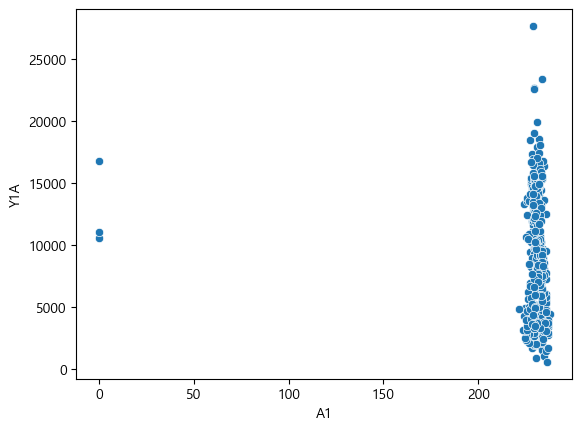

In [250]:
sns.scatterplot(df1, x='A1',y='Y1A')

<Axes: xlabel='A1', ylabel='Y1A'>

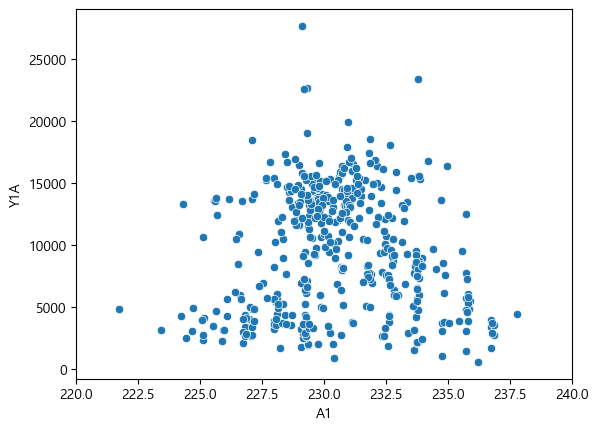

In [253]:
# x축의 범위 지정
plt.xlim([220,240])
sns.scatterplot(df1, x='A1',y='Y1A')

<Axes: xlabel='A1', ylabel='Y1A'>

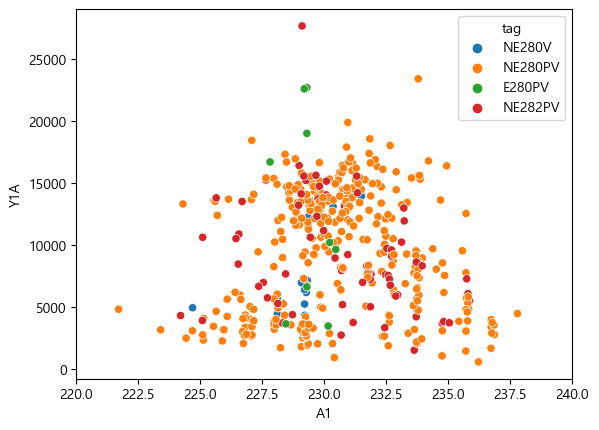

In [254]:
plt.xlim([220,240])
sns.scatterplot(df1, x='A1',y='Y1A',hue='tag')

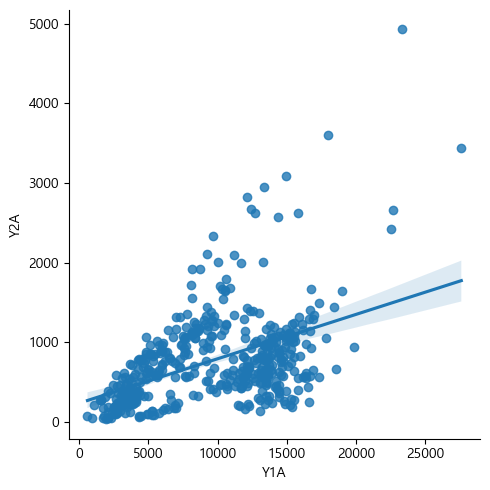

In [255]:
# 회귀선을 그려 산점도 시각화
sns.lmplot(df1,x='Y1A',y='Y2A')  # 칠해진 부분은 신뢰구간이다.

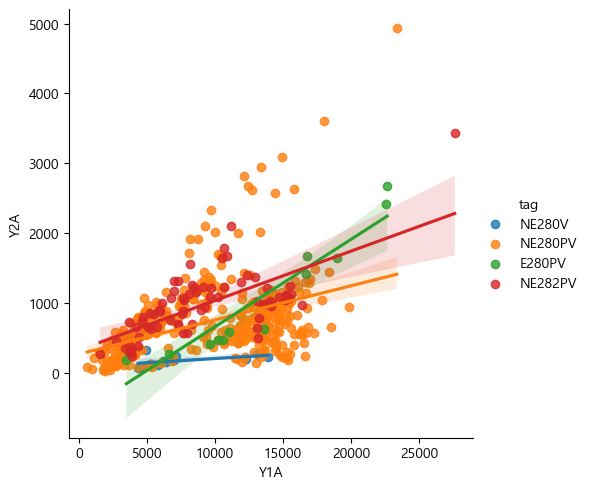

In [257]:
# 회귀선을 그려 산점도 시각화
sns.lmplot(df1,x='Y1A',y='Y2A',hue='tag') # 칠해진 부분은 신뢰 구간이다.

# 결측값 처리
- 제거
- 대치 : 단순대치 / 알고리즘 / 보간법 

In [260]:
import missingno as msno

In [259]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [261]:
df1 = pd.read_csv('06_Data_001.csv')
df1.head()

DATE  Target  Etching1  Etching2  Etching3  CVD1  CVD2  CVD3  Photo1  \
0  2017-01-23    0.10     34.12     16.24      0.01  0.01  0.01 26.25   35.00   
1  2017-01-23    0.40     35.56     17.49      0.01  0.01  0.01 26.25   35.00   
2  2017-01-23    0.70     34.18     33.91      0.01  0.01  0.01 16.50    0.01   
3  2017-01-23    0.60     33.64     38.48      0.00  0.00  0.01  0.02    0.00   
4  2017-01-23    0.70     31.11     44.49      0.00  0.01  0.01  0.02    0.00   

   Photo2  ...  D2TI17106 5  D2TI17107 14  D2TI17109 6  D2TI17109 9  \
0   70.40  ...       127.18        108.04       146.58       146.69   
1   73.10  ...       125.35        107.53       146.76       147.27   
2   67.52  ...       125.75        108.06       147.25       147.33   
3   67.50  ...       126.30        108.78       147.52       147.56   
4   67.89  ...       126.65        109.79       147.90       148.18   

   D2TI17109 14  D2TI17109 15  D2TI18038 13  D2TIC13007 7  D2TIC13007 8  \
0        146.40        146.54        152.01        128.02        127.98   
1        146.87        146.91        151.95        128.06        128.04   
2        147.47        147.40        152.11        128.04        128.05   
3        147.79        147.87        152.03        128.06        128.04   
4        148.37        148.27        152.08        127.98        128.00   

   D2TIC13111 11  
0         191.23  
1         190.77  
2         191.91  
3         192.94  
4         193.79  

[5 rows x 67 columns]

In [262]:
df1.columns

Index(['DATE', 'Target', 'Etching1', 'Etching2', 'Etching3', 'CVD1', 'CVD2',
       'CVD3', 'Photo1', 'Photo2', 'D2TI13027 24', 'D2TI13029 18',
       'D2TI13029 19', 'D2TI13029 20', 'D2TI13030 1', 'D2TI13031 21',
       'D2TI13032 16', 'D2TI13047 20', 'D2TI13050 12', 'D2TI13078 8',
       'D2TI13084 18', 'D2TI13102 24', 'D2TI13105 23', 'D2TI13107 8',
       'D2TI13108 7', 'D2TI13108 8', 'D2TI13109 5', 'D2TI13109 7',
       'D2TI13109 9', 'D2TI13109 17', 'D2TI13109 20', 'D2TI13110 13',
       'D2TI13123 6', 'D2TI13132 1', 'D2TI13132 8', 'D2TI13132 23',
       'D2TI13134 19', 'D2TI13135 3', 'D2TI13152 10', 'D2TI13152 23',
       'D2TI13206 4', 'D2TI13206 16', 'D2TI13208 9', 'D2TI13208 24',
       'D2TI13215 19', 'D2TI13415 21', 'D2TI14002 22', 'D2TI14009 2',
       'D2TI14010 6', 'D2TI14010 23', 'D2TI14021 7', 'D2TI16002 2',
       'D2TI17103 15', 'D2TI17103 22', 'D2TI17104 15', 'D2TI17105 4',
       'D2TI17105 14', 'D2TI17106 5', 'D2TI17107 14', 'D2TI17109 6',
       'D2TI17109 9', 'D2

<Axes: >

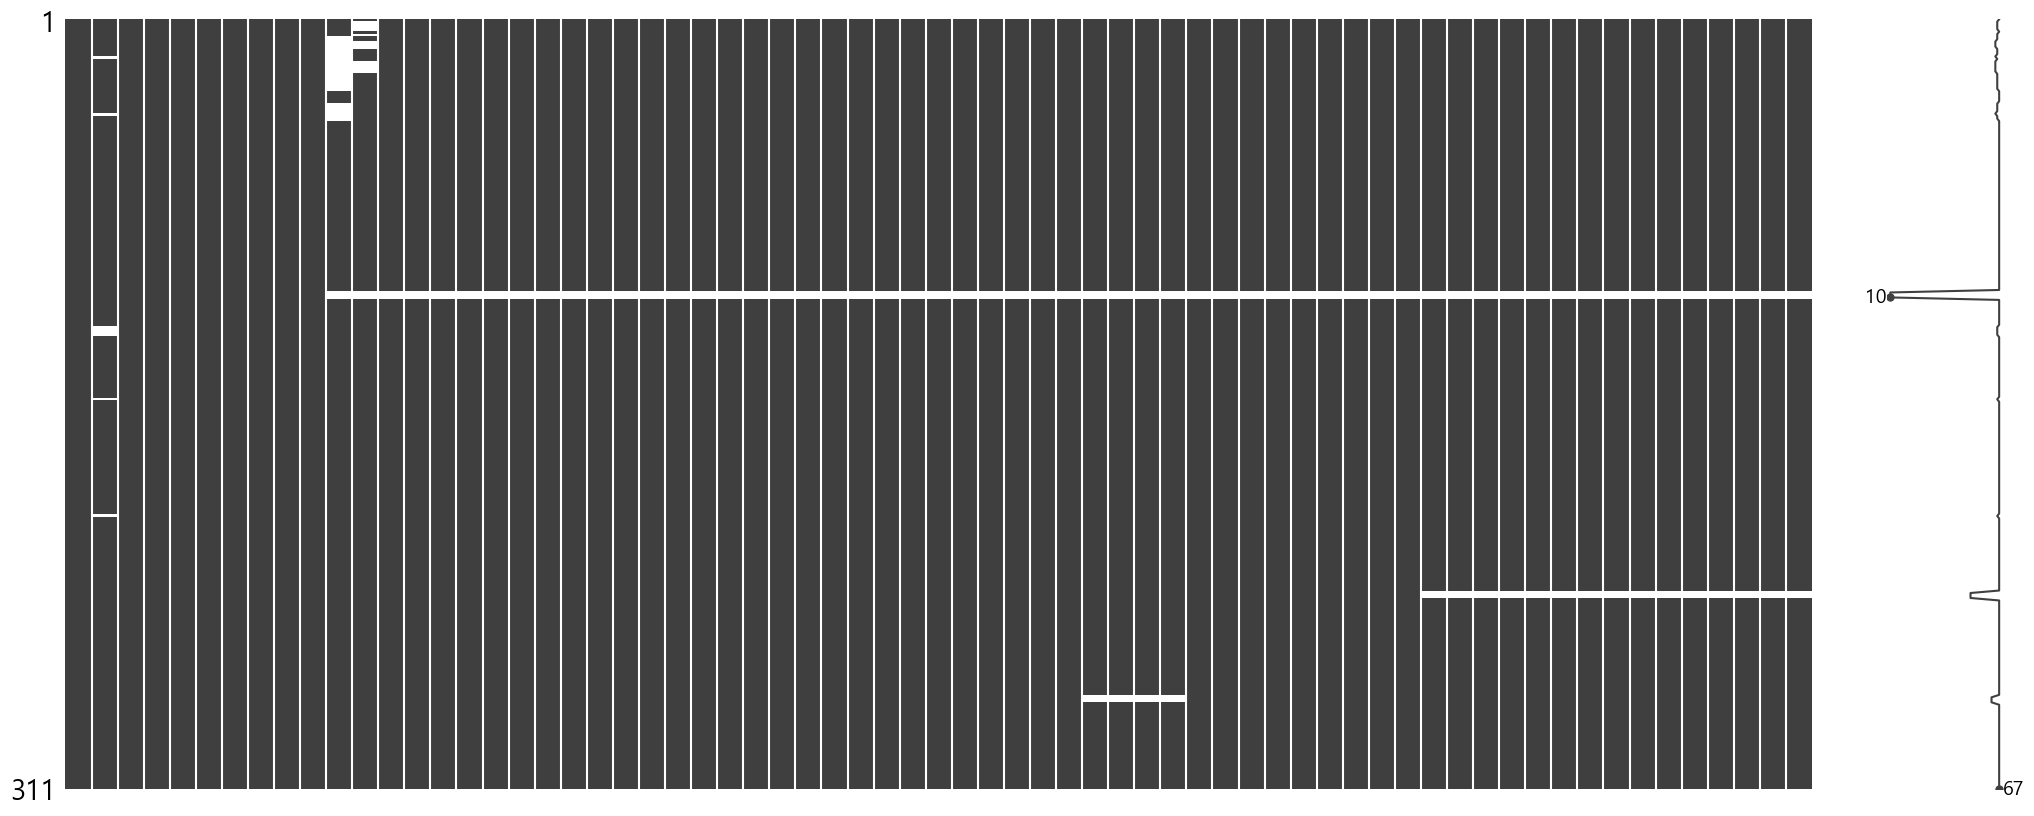

In [263]:
msno.matrix(df1) # 흰 부분이 결측치이다.

In [266]:
# 가로로 연속되어 있는 결측값들은 연결되어 있을 가능성이 있다.
df1.columns[10:]


Index(['D2TI13027 24', 'D2TI13029 18', 'D2TI13029 19', 'D2TI13029 20',
       'D2TI13030 1', 'D2TI13031 21', 'D2TI13032 16', 'D2TI13047 20',
       'D2TI13050 12', 'D2TI13078 8', 'D2TI13084 18', 'D2TI13102 24',
       'D2TI13105 23', 'D2TI13107 8', 'D2TI13108 7', 'D2TI13108 8',
       'D2TI13109 5', 'D2TI13109 7', 'D2TI13109 9', 'D2TI13109 17',
       'D2TI13109 20', 'D2TI13110 13', 'D2TI13123 6', 'D2TI13132 1',
       'D2TI13132 8', 'D2TI13132 23', 'D2TI13134 19', 'D2TI13135 3',
       'D2TI13152 10', 'D2TI13152 23', 'D2TI13206 4', 'D2TI13206 16',
       'D2TI13208 9', 'D2TI13208 24', 'D2TI13215 19', 'D2TI13415 21',
       'D2TI14002 22', 'D2TI14009 2', 'D2TI14010 6', 'D2TI14010 23',
       'D2TI14021 7', 'D2TI16002 2', 'D2TI17103 15', 'D2TI17103 22',
       'D2TI17104 15', 'D2TI17105 4', 'D2TI17105 14', 'D2TI17106 5',
       'D2TI17107 14', 'D2TI17109 6', 'D2TI17109 9', 'D2TI17109 14',
       'D2TI17109 15', 'D2TI18038 13', 'D2TIC13007 7', 'D2TIC13007 8',
       'D2TIC13111 11'],
   

In [267]:
df1[df1.columns[10:]]

D2TI13027 24  D2TI13029 18  D2TI13029 19  D2TI13029 20  D2TI13030 1  \
0          197.57        193.37        193.15        192.87       190.09   
1          196.41           NaN        191.48        191.49       189.41   
2          198.67           NaN        193.80        193.99       187.98   
3          198.52           NaN        193.06        193.16       190.91   
4          197.03           NaN        192.45        192.24       190.44   
..            ...           ...           ...           ...          ...   
306        207.02        201.61        201.71        201.63       198.19   
307        206.37        201.25        201.27        201.26       198.70   
308        206.27        200.98        201.00        201.05       197.98   
309        206.69        201.34        201.32        201.34       197.83   
310        205.95        201.00        200.94        200.84       198.26   

     D2TI13031 21  D2TI13032 16  D2TI13047 20  D2TI13050 12  D2TI13078 8  ...  \
0          187.43        185.39        224.35        221.41       215.59  ...   
1          185.77        183.33        224.67        218.94       215.85  ...   
2          188.74        185.85        224.48        219.56       215.58  ...   
3          188.11        185.56        223.88        217.21       212.59  ...   
4          187.05        185.00        224.00        218.88       215.19  ...   
..            ...           ...           ...           ...          ...  ...   
306        195.65        192.93        231.20        225.10       224.00  ...   
307        195.21        192.57        231.29        225.08       223.95  ...   
308        195.09        192.37        231.26        225.23       225.33  ...   
309        195.37        192.54        231.29        225.23       225.39  ...   
310        194.71        192.36        231.19        225.08       224.88  ...   

     D2TI17106 5  D2TI17107 14  D2TI17109 6  D2TI17109 9  D2TI17109 14  \
0         127.18        108.04       146.58       146.69        146.40   
1         125.35        107.53       146.76       147.27        146.87   
2         125.75        108.06       147.25       147.33        147.47   
3         126.30        108.78       147.52       147.56        147.79   
4         126.65        109.79       147.90       148.18        148.37   
..           ...           ...          ...          ...           ...   
306       132.78        115.46       152.29       152.37        152.21   
307       132.83        115.36       152.28       152.29        152.45   
308       132.58        116.41       152.52       152.51        152.45   
309       134.32        119.11       152.60       152.58        152.60   
310       135.00        117.83       152.63       152.52        152.49   

     D2TI17109 15  D2TI18038 13  D2TIC13007 7  D2TIC13007 8  D2TIC13111 11  
0          146.54        152.01        128.02        127.98         191.23  
1          146.91        151.95        128.06        128.04         190.77  
2          147.40        152.11        128.04        128.05         191.91  
3          147.87        152.03        128.06        128.04         192.94  
4          148.27        152.08        127.98        128.00         193.79  
..            ...           ...           ...           ...            ...  
306        152.16        160.06        127.98        128.07         190.49  
307        152.44        160.07        127.93        127.96         190.54  
308        152.46        160.12        128.00        127.89         189.52  
309        152.66        160.10        128.03        127.99         189.85  
310        152.49        160.08        128.03        127.98         190.24  

[311 rows x 57 columns]

In [268]:
df_na = df1[df1.columns[10:]]
df_na.head(2)

D2TI13027 24  D2TI13029 18  D2TI13029 19  D2TI13029 20  D2TI13030 1  \
0        197.57        193.37        193.15        192.87       190.09   
1        196.41           NaN        191.48        191.49       189.41   

   D2TI13031 21  D2TI13032 16  D2TI13047 20  D2TI13050 12  D2TI13078 8  ...  \
0        187.43        185.39        224.35        221.41       215.59  ...   
1        185.77        183.33        224.67        218.94       215.85  ...   

   D2TI17106 5  D2TI17107 14  D2TI17109 6  D2TI17109 9  D2TI17109 14  \
0       127.18        108.04       146.58       146.69        146.40   
1       125.35        107.53       146.76       147.27        146.87   

   D2TI17109 15  D2TI18038 13  D2TIC13007 7  D2TIC13007 8  D2TIC13111 11  
0        146.54        152.01        128.02        127.98         191.23  
1        146.91        151.95        128.06        128.04         190.77  

[2 rows x 57 columns]

In [270]:
df_na.isnull().sum().head(2)

D2TI13027 24    32
D2TI13029 18    16
dtype: int64

In [272]:
df_na['D2TI13029 18'].head(10)

0   193.37
1      NaN
2      NaN
3      NaN
4      NaN
5   192.56
6      NaN
7   193.98
8   193.91
9      NaN
Name: D2TI13029 18, dtype: float64

In [273]:
# 결측치 제거
df_na['D2TI13029 18'].head(10).dropna()

#inplace = True 를 써줘야 원본 데이터가 바뀐다.

0   193.37
5   192.56
7   193.98
8   193.91
Name: D2TI13029 18, dtype: float64

In [274]:
# 단순대치
df_na['D2TI13029 18'].head(10).fillna(0)

# 0으로 대치

0   193.37
1     0.00
2     0.00
3     0.00
4     0.00
5   192.56
6     0.00
7   193.98
8   193.91
9     0.00
Name: D2TI13029 18, dtype: float64

In [275]:
# 평균으로 대치
df_na['D2TI13029 18'].head(10).fillna(df_na['D2TI13029 18'].mean())

0   193.37
1   197.30
2   197.30
3   197.30
4   197.30
5   192.56
6   197.30
7   193.98
8   193.91
9   197.30
Name: D2TI13029 18, dtype: float64

In [276]:
# 중앙값으로 대치
df_na['D2TI13029 18'].head(10).fillna(df_na['D2TI13029 18'].median())

0   193.37
1   198.03
2   198.03
3   198.03
4   198.03
5   192.56
6   198.03
7   193.98
8   193.91
9   198.03
Name: D2TI13029 18, dtype: float64

In [277]:
# ffill()
# 결측치 이전의 값으로 채우기
# forward fill
df_na['D2TI13029 18'].head(10).ffill()

0   193.37
1   193.37
2   193.37
3   193.37
4   193.37
5   192.56
6   192.56
7   193.98
8   193.91
9   193.91
Name: D2TI13029 18, dtype: float64

In [278]:
df_na['D2TI13029 18'].head(10) 

0   193.37
1      NaN
2      NaN
3      NaN
4      NaN
5   192.56
6      NaN
7   193.98
8   193.91
9      NaN
Name: D2TI13029 18, dtype: float64

In [279]:
# bfill()
# 결측치 이후의 값으로 채우기
# backward fill
df_na['D2TI13029 18'].head(10).bfill()

0   193.37
1   192.56
2   192.56
3   192.56
4   192.56
5   192.56
6   193.98
7   193.98
8   193.91
9      NaN
Name: D2TI13029 18, dtype: float64

In [280]:
# 결측치 간 데이터가 가까울때만 사용할 수 있다.

In [281]:
# 보간법

In [282]:
# .interpolate()
df_na['D2TI13029 18'].head(10).interpolate(method='linear') # 선형으로 채워짐

0   193.37
1   193.21
2   193.05
3   192.88
4   192.72
5   192.56
6   193.27
7   193.98
8   193.91
9   193.91
Name: D2TI13029 18, dtype: float64

In [283]:
df_na['D2TI13029 18'].head(10) 

0   193.37
1      NaN
2      NaN
3      NaN
4      NaN
5   192.56
6      NaN
7   193.98
8   193.91
9      NaN
Name: D2TI13029 18, dtype: float64

In [284]:
# time : 시계열 데이터에서 시간 간격에 따라 선형 보간.
# nearest : 가장 가까운 값으로 대치. 이전/ 이후 중에 더 가까운 값을 가져옴

# 이상치
- df.loc[cond1,'column'] = value

In [285]:
# 03_Delivery.csv

In [288]:
df1 = pd.read_csv('03_Delivery.csv' , encoding ='cp949')
df1

결제수단                   배송번호                배송시작일               배송완료일  \
0      무통장입금  D-20181227-0000648-00   2019-01-07 오전 8:56  2019-01-11 오전 5:32   
1      무통장입금  D-20181229-0000119-00   2019-01-03 오전 9:30  2019-01-07 오전 5:32   
2      무통장입금  D-20181230-0000100-00   2019-01-03 오전 9:30  2019-01-07 오전 5:32   
3      무통장입금  D-20181231-0000087-00   2019-01-03 오전 9:30  2019-01-07 오전 5:32   
4      무통장입금  D-20181231-0000108-00   2019-01-07 오전 8:56  2019-01-11 오전 5:32   
...      ...                    ...                  ...                 ...   
46744     카드  D-20171229-0000036-00   2017-12-29 오후 4:32  2018-01-02 오전 5:31   
46745     카드  D-20171229-0000043-00   2018-01-03 오전 9:45  2018-01-07 오전 5:38   
46746     카드  D-20171230-0000022-01   2018-01-02 오후 7:06  2018-01-11 오전 2:46   
46747     카드  D-20171231-0000017-01   2018-01-03 오후 2:00  2018-01-06 오후 6:06   
46748     카드  D-20171231-0000026-00  2018-01-03 오후 12:43  2018-01-07 오전 5:38   

       상품구매금액    상품번호  수량    주문경로       주문일  
0       71450 1077.00   1   PC쇼핑몰  20181227  
1      141240   42.00   2    모바일웹  20181229  
2       13910 1271.00   1    모바일웹  20181230  
3       81600 1085.00   1    모바일웹  20181231  
4       94710 1106.00   1    모바일웹  20181231  
...       ...     ...  ..     ...       ...  
46744   52800  445.00   1    모바일웹  20171229  
46745  112200  172.00   2    모바일웹  20171229  
46746   36000  140.00   1  네이버 페이  20171230  
46747   73460  184.00   1  네이버 페이  20171231  
46748   81620  479.00   1    모바일웹  20171231  

[46749 rows x 9 columns]

In [290]:
df1.describe() #수량에 -데이터가 있으면 환불한 데이터 일 수 있다

# -1 : 환불한 데이터 일 수 있다

상품구매금액      상품번호       수량         주문일
count   46749.00  46661.00 46749.00    46749.00
mean    69368.14    891.68     1.18 20184044.49
std     66112.47  11339.53     0.68     5192.40
min         0.00     38.00    -1.00 20170101.00
25%     32880.00    378.00     1.00 20180727.00
50%     67780.00    928.00     1.00 20181118.00
75%     92130.00   1209.00     1.00 20190225.00
max   4963400.00 999999.00    50.00 20190619.00

In [291]:
df1.head()

결제수단                   배송번호               배송시작일               배송완료일  \
0  무통장입금  D-20181227-0000648-00  2019-01-07 오전 8:56  2019-01-11 오전 5:32   
1  무통장입금  D-20181229-0000119-00  2019-01-03 오전 9:30  2019-01-07 오전 5:32   
2  무통장입금  D-20181230-0000100-00  2019-01-03 오전 9:30  2019-01-07 오전 5:32   
3  무통장입금  D-20181231-0000087-00  2019-01-03 오전 9:30  2019-01-07 오전 5:32   
4  무통장입금  D-20181231-0000108-00  2019-01-07 오전 8:56  2019-01-11 오전 5:32   

   상품구매금액    상품번호  수량   주문경로       주문일  
0   71450 1077.00   1  PC쇼핑몰  20181227  
1  141240   42.00   2   모바일웹  20181229  
2   13910 1271.00   1   모바일웹  20181230  
3   81600 1085.00   1   모바일웹  20181231  
4   94710 1106.00   1   모바일웹  20181231

In [293]:
# 음수 이상치
cond1 = (df1['수량']<0)
df1.loc[cond1].shape  # 음수인 데이터가 16개 정도 있다.                        

(16, 9)

In [294]:
df1.loc[cond1]

결제수단                   배송번호                배송시작일  \
11        무통장입금  D-20181231-0000205-01   2019-01-03 오전 9:30   
22        무통장입금  D-20181231-0000635-00   2019-01-03 오전 9:30   
97           카드  D-20190102-0000193-00   2019-01-03 오전 9:28   
334          카드  D-20190103-0000849-03   2019-01-07 오전 8:56   
445       무통장입금  D-20190104-0000596-01   2019-01-08 오전 8:43   
502          카드  D-20190105-0000109-00   2019-01-08 오전 8:43   
583      적립금,카드  D-20190107-0000092-00   2019-01-08 오전 8:43   
898   적립금,무통장입금  D-20190109-0000411-00   2019-01-10 오전 9:09   
970       무통장입금  D-20190109-0000959-00  2019-01-11 오전 10:10   
1240         카드  D-20190113-0000092-01   2019-01-15 오전 9:06   
1681      무통장입금  D-20190116-0000511-00   2019-01-17 오전 9:54   
2014      무통장입금  D-20190121-0000077-00   2019-01-22 오전 9:04   
2212      무통장입금  D-20190122-0000426-00   2019-01-22 오후 6:18   
2341  적립금,무통장입금  D-20190123-0000529-01   2019-01-23 오후 6:50   
2416    실시간계좌이체  D-20190123-0001039-01   2019-01-24 오후 6:34   
2464         카드  D-20190124-0000014-00   2019-01-24 오후 6:32   

                   배송완료일  상품구매금액    상품번호  수량    주문경로       주문일  
11    2019-01-07 오전 5:32  107910 1059.00  -1   PC쇼핑몰  20181231  
22    2019-01-07 오전 5:32   78870  603.00  -1   PC쇼핑몰  20181231  
97    2019-01-07 오전 5:32   78870  603.00  -1    모바일웹  20190102  
334   2019-01-11 오전 5:32   71450 1077.00  -1    모바일웹  20190103  
445   2019-01-12 오전 5:32  124250   90.00  -1    모바일웹  20190104  
502   2019-01-12 오전 5:32   93720 1123.00  -1   PC쇼핑몰  20190105  
583   2019-01-12 오전 5:32   75570 1069.00  -1    모바일웹  20190107  
898   2019-01-14 오전 5:32  192000 1375.00  -1   PC쇼핑몰  20190109  
970   2019-01-15 오전 5:32   42350 1283.00  -1   PC쇼핑몰  20190109  
1240  2019-01-19 오전 5:32   67320 1282.00  -1   PC쇼핑몰  20190113  
1681  2019-01-21 오전 5:32   70620 1275.00  -1   PC쇼핑몰  20190116  
2014  2019-01-26 오전 5:32   78210  397.00  -1    모바일웹  20190121  
2212  2019-01-26 오전 5:32   83550  962.00  -1   PC쇼핑몰  20190122  
2341  2019-01-27 오전 5:32  126940 1373.00  -1    모바일웹  20190123  
2416  2019-02-02 오전 3:01   95110 1318.00  -1  네이버 페이  20190123  
2464  2019-01-28 오전 5:32  113520  445.00  -1    모바일웹  20190124

In [296]:
df1['수량clean'] = df1['수량']
# 이후에 이상치가 아닐 수도 있으니, 원본 컬럼을 남겨 놓고
# 새로운 컬럼 생성

In [297]:
cond1 = (df1['수량']<0)
df1.loc[cond1,'수량clean'] =1

In [298]:
df1.describe()

상품구매금액      상품번호       수량         주문일  수량clean
count   46749.00  46661.00 46749.00    46749.00 46749.00
mean    69368.14    891.68     1.18 20184044.49     1.18
std     66112.47  11339.53     0.68     5192.40     0.68
min         0.00     38.00    -1.00 20170101.00     1.00
25%     32880.00    378.00     1.00 20180727.00     1.00
50%     67780.00    928.00     1.00 20181118.00     1.00
75%     92130.00   1209.00     1.00 20190225.00     1.00
max   4963400.00 999999.00    50.00 20190619.00    50.00

In [299]:
df1['상품구매금액clean'] = df1['상품구매금액']
df1.loc[cond1,'상품구매금액clean'] = -df1['상품구매금액']

In [301]:
df1['상품구매금액clean'].sum()
# 환불을 반영한 결과이다.

3239890865

In [302]:
df1['상품구매금액'].sum() -df1['상품구매금액clean'].sum()

3000520

In [303]:
# 상품번호 999999.00 이게 이상하다

df1.describe()

상품구매금액      상품번호       수량         주문일  수량clean  상품구매금액clean
count   46749.00  46661.00 46749.00    46749.00 46749.00     46749.00
mean    69368.14    891.68     1.18 20184044.49     1.18     69303.96
std     66112.47  11339.53     0.68     5192.40     0.68     66179.75
min         0.00     38.00    -1.00 20170101.00     1.00   -192000.00
25%     32880.00    378.00     1.00 20180727.00     1.00     32450.00
50%     67780.00    928.00     1.00 20181118.00     1.00     67650.00
75%     92130.00   1209.00     1.00 20190225.00     1.00     92130.00
max   4963400.00 999999.00    50.00 20190619.00    50.00   4963400.00

In [316]:
cond1 = df1['상품번호']== 999999
df1.loc[cond1]

결제수단                   배송번호                배송시작일  \
0          무통장입금  D-20181227-0000648-00   2019-01-07 오전 8:56   
1          무통장입금  D-20181229-0000119-00   2019-01-03 오전 9:30   
2          무통장입금  D-20181230-0000100-00   2019-01-03 오전 9:30   
3          무통장입금  D-20181231-0000087-00   2019-01-03 오전 9:30   
4          무통장입금  D-20181231-0000108-00   2019-01-07 오전 8:56   
...          ...                    ...                  ...   
46745         카드  D-20171229-0000043-00   2018-01-03 오전 9:45   
46746         카드  D-20171230-0000022-01   2018-01-02 오후 7:06   
46747         카드  D-20171231-0000017-01   2018-01-03 오후 2:00   
46748         카드  D-20171231-0000026-00  2018-01-03 오후 12:43   
상품번호clean    NaN                    NaN                  NaN   

                        배송완료일    상품구매금액    상품번호   수량    주문경로         주문일  \
0          2019-01-11 오전 5:32  71450.00  999999 1.00   PC쇼핑몰 20181227.00   
1          2019-01-07 오전 5:32 141240.00  999999 2.00    모바일웹 20181229.00   
2          2019-01-07 오전 5:32  13910.00  999999 1.00    모바일웹 20181230.00   
3          2019-01-07 오전 5:32  81600.00  999999 1.00    모바일웹 20181231.00   
4          2019-01-11 오전 5:32  94710.00  999999 1.00    모바일웹 20181231.00   
...                       ...       ...     ...  ...     ...         ...   
46745      2018-01-07 오전 5:38 112200.00  999999 2.00    모바일웹 20171229.00   
46746      2018-01-11 오전 2:46  36000.00  999999 1.00  네이버 페이 20171230.00   
46747      2018-01-06 오후 6:06  73460.00  999999 1.00  네이버 페이 20171231.00   
46748      2018-01-07 오전 5:38  81620.00  999999 1.00    모바일웹 20171231.00   
상품번호clean                 NaN       NaN  999999  NaN     NaN         NaN   

           수량clean  상품구매금액clean  상품번호clean  
0             1.00     71450.00    1077.00  
1             2.00    141240.00      42.00  
2             1.00     13910.00    1271.00  
3             1.00     81600.00    1085.00  
4             1.00     94710.00    1106.00  
...            ...          ...        ...  
46745         2.00    112200.00     172.00  
46746         1.00     36000.00     140.00  
46747         1.00     73460.00     184.00  
46748         1.00     81620.00     479.00  
상품번호clean      NaN          NaN        NaN  

[46750 rows x 12 columns]

In [313]:
import numpy as np
df1['상품번호clean'] = df1['상품번호']

In [319]:
df1.loc[cond1 , '상품번호clean'] = np.nan 
#상품번호가 999999인걸 nan으로 바꾸는 것이다

In [320]:
df1.describe()

상품구매금액      상품번호       수량         주문일  수량clean  상품구매금액clean  \
count   46749.00  46750.00 46749.00    46749.00 46749.00     46749.00   
mean    69368.14 999999.00     1.18 20184044.49     1.18     69303.96   
std     66112.47      0.00     0.68     5192.40     0.68     66179.75   
min         0.00 999999.00    -1.00 20170101.00     1.00   -192000.00   
25%     32880.00 999999.00     1.00 20180727.00     1.00     32450.00   
50%     67780.00 999999.00     1.00 20181118.00     1.00     67650.00   
75%     92130.00 999999.00     1.00 20190225.00     1.00     92130.00   
max   4963400.00 999999.00    50.00 20190619.00    50.00   4963400.00   

       상품번호clean  
count       0.00  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN